In [1]:
library("phangorn")
library("rlist")
library("reshape2")
library("ggplot2")
library("geiger")
library("adephylo")
library("phytools")
library("hrbrthemes")
library("ggtree")
library("pheatmap")
library("gplots")
library("ape")
library("plotrix")
library("plyr")
library("dplyr")
library("rstatix")
library("grid")
library("gridExtra")
#library("sf")
library("ggforce")
library("viridis")



Loading required package: ape

Loading required package: ade4

Loading required package: maps

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotati

In [ ]:
#
# Compute RF distances without Mouse MSAs and structure-based MSAs - DO NOT RUN
#

pfam_dirs = grep("PF*",list.dirs(path = ".",recursive = FALSE),value = TRUE)

seq_prefix = "results_without_mouse_10_samples/tcoffee/"
seq_prefix_mouse = "results/tcoffee/"

#struct_prefix = "results/3DCoffee/"

total_rf_me_seq_vs_ml_seq_ref = list()
#total_rf_me_struct_vs_ml_seq_ref = list()
#total_rf_ml_seq_vs_ml_struct_ref = list()
agg_RF_me_seq_vs_ml_seq_ref = c()
#agg_RF_me_struct_vs_ml_seq_ref = c()
#agg_RF_ml_seq_vs_ml_struct_ref = c()

for (family in pfam_dirs) {
    family = basename(family)
    #family = "PF12796"
    setwd(basename(family))
    codefile = read.table(file = paste0(seq_prefix,"file.code_name"))
    orgs<-read.table(file = paste0(family,".orthologs_org_ids_to_concatenate"))
    num_of_species = length(orgs$V1) - 1
    
    #
    # Read ME and ML supermatrix and supertree trees and reference ME and ML for seq and struct MOUSE trees
    #
    
    
    all_units_trees_seq <- read.tree(paste0(seq_prefix,"/all_units.nwk"),keep.multi=TRUE)
    all_units_trees_seq <- multi2di(all_units_trees_seq)
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_trees[[x]][["tip.label"]][j])])}}

    all_units_raxml_trees_seq <- read.tree(paste0(seq_prefix,"all_units_RAxML_trees.nwk"),keep.multi=TRUE)
    all_units_raxml_trees_seq <- multi2di(all_units_raxml_trees_seq)
    #for(x in 1:length(all_units_raxml_trees)) { for (j in 1:length(all_units_raxml_trees[[x]]$tip.label)) { all_units_raxml_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_trees[[x]][["tip.label"]][j])])}}

    all_units_superfine_trees_seq <- read.tree(paste0(seq_prefix,"all_units_superfine_trees.nwk"),keep.multi=TRUE)
    all_units_superfine_trees_seq <- multi2di(all_units_superfine_trees_seq)    
    #for(x in 1:length(all_units_superfine_trees)) { for (j in 1:length(all_units_superfine_trees[[x]]$tip.label)) { all_units_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_superfine_trees[[x]][["tip.label"]][j])])}}

    all_units_raxml_superfine_trees_seq <- read.tree(paste0(seq_prefix,"all_units_RAxML_superfine_trees.nwk"),keep.multi=TRUE)
    all_units_raxml_superfine_trees_seq <- multi2di(all_units_raxml_superfine_trees_seq)        
    #for(x in 1:length(all_units_raxml_superfine_trees)) { for (j in 1:length(all_units_raxml_superfine_trees[[x]]$tip.label)) { all_units_raxml_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_superfine_trees[[x]][["tip.label"]][j])])}}
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == all_units_trees[[x]][["tip.label"]][j])])}}

    #tmalign1d_tree <- read.tree(file=paste0(struct_prefix,family,".MOUSE_domain_sequences_after_intersection_tmalign_colabfold_coded.phylip_fastme_tree.nwk"),keep.multi=FALSE)
    #for (j in 1:length(tmalign1d_tree$tip.label)) { tmalign1d_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == tmalign1d_tree[["tip.label"]][j])])}
    #tmalign1d_tree_cp = tmalign1d_tree
    #for (j in 1:length(tmalign1d_tree$tip.label)) { tmalign1d_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == tmalign1d_tree[["tip.label"]][j])])}
    #tmalign1d_tree=list(tmalign1d_tree)
    #class(tmalign1d_tree)="multiPhylo"

    #tmalign1d_raxml_tree <- read.tree(file=paste0(struct_prefix,"RAxML_bestTree.",family,".MOUSE_domain_sequences_after_intersection_tmalign_colabfold_coded_raxml.nwk"),keep.multi=FALSE)
    #for (j in 1:length(tmalign1d_raxml_tree$tip.label)) { tmalign1d_raxml_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == tmalign1d_raxml_tree[["tip.label"]][j])])}
    #tmalign1d_raxml_tree_cp = tmalign1d_raxml_tree
    #for (j in 1:length(tmalign1d_raxml_tree$tip.label)) { tmalign1d_raxml_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == tmalign1d_raxml_tree[["tip.label"]][j])])}
    #tmalign1d_raxml_tree=list(tmalign1d_raxml_tree)
    #class(tmalign1d_raxml_tree)="multiPhylo"
    
    #all_units_trees_struct <- read.tree(paste0(struct_prefix,"/all_units.nwk"),keep.multi=TRUE)
    #all_units_trees_struct <- multi2di(all_units_trees_struct)
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_trees[[x]][["tip.label"]][j])])}}

    #all_units_raxml_trees_struct <- read.tree(paste0(struct_prefix,"all_units_RAxML_trees.nwk"),keep.multi=TRUE)
    #all_units_raxml_trees_struct <- multi2di(all_units_raxml_trees_struct)
    #for(x in 1:length(all_units_raxml_trees)) { for (j in 1:length(all_units_raxml_trees[[x]]$tip.label)) { all_units_raxml_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_trees[[x]][["tip.label"]][j])])}}

    #all_units_superfine_trees_struct <- read.tree(paste0(struct_prefix,"all_units_superfine_trees.nwk"),keep.multi=TRUE)
    #all_units_superfine_trees_struct <- multi2di(all_units_superfine_trees_struct)    
    #for(x in 1:length(all_units_superfine_trees)) { for (j in 1:length(all_units_superfine_trees[[x]]$tip.label)) { all_units_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_superfine_trees[[x]][["tip.label"]][j])])}}

    #all_units_raxml_superfine_trees_struct <- read.tree(paste0(struct_prefix,"all_units_RAxML_superfine_trees.nwk"),keep.multi=TRUE)
    #all_units_raxml_superfine_trees_struct <- multi2di(all_units_raxml_superfine_trees_struct)        
    #for(x in 1:length(all_units_raxml_superfine_trees)) { for (j in 1:length(all_units_raxml_superfine_trees[[x]]$tip.label)) { all_units_raxml_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_superfine_trees[[x]][["tip.label"]][j])])}}
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == all_units_trees[[x]][["tip.label"]][j])])}}

    seq_tree <- read.tree(file=paste0(seq_prefix_mouse,family,".MOUSE_domain_sequences_after_intersection_coded.phylip_fastme_tree.nwk"),keep.multi=FALSE)
    for (j in 1:length(seq_tree$tip.label)) { seq_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == seq_tree[["tip.label"]][j])])}
    seq_tree_cp = seq_tree
    for (j in 1:length(seq_tree$tip.label)) { seq_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == seq_tree[["tip.label"]][j])])}
    seq_tree=list(seq_tree)
    class(seq_tree)="multiPhylo"

    seq_raxml_tree <- read.tree(file=paste0(seq_prefix_mouse,"RAxML_bestTree.",family,".MOUSE_domain_sequences_after_intersection_coded_raxml.nwk"),keep.multi=FALSE)
    for (j in 1:length(seq_raxml_tree$tip.label)) { seq_raxml_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == seq_raxml_tree[["tip.label"]][j])])}
    seq_raxml_tree_cp = seq_raxml_tree
    for (j in 1:length(seq_raxml_tree$tip.label)) { seq_raxml_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == seq_raxml_tree[["tip.label"]][j])])}
    seq_raxml_tree=list(seq_raxml_tree)
    class(seq_raxml_tree)="multiPhylo"
    
    
    #
    # ME seq vs ML seq
    #

    me_seq_vs_ml_seq_ref = c(seq_raxml_tree,all_units_trees_seq,all_units_superfine_trees_seq)
    class(me_seq_vs_ml_seq_ref)="multiPhylo"
    rf_me_seq_vs_ml_seq_ref = RF.dist(me_seq_vs_ml_seq_ref,normalize=TRUE)
    rf_me_seq_vs_ml_seq_ref_data =data.matrix(rf_me_seq_vs_ml_seq_ref)
    
    mean_rf_me_seq_vs_ml_seq_ref = c()
    se_rf_me_seq_vs_ml_seq_ref = c()
    
    for (i in seq(2,(num_of_species*10*2)+1,by=10)) {
        only_with_ref = rf_me_seq_vs_ml_seq_ref_data[1,]
        mean_rf_me_seq_vs_ml_seq_ref = c(mean_rf_me_seq_vs_ml_seq_ref,mean(only_with_ref[i:(i+9)]))
        se_rf_me_seq_vs_ml_seq_ref =c(se_rf_me_seq_vs_ml_seq_ref,(sd(only_with_ref[i:(i+9)]/sqrt(10))))
    }

    units_names = c()
    for (i in 1:num_of_species) {units_names=c(units_names,paste0("unit_",i))}
    units_names_init=c(units_names,units_names)
    units_names = units_names_init
    
    mydf2 = data.frame(units_names,mean_rf_me_seq_vs_ml_seq_ref,se_rf_me_seq_vs_ml_seq_ref)
    mydf2$units_names = as.character(mydf2$units_names)
    mydf2$units_names = factor(mydf2$units_names, levels=unique(mydf2$units_names))
    
    ex_mydf2 = mydf2[,2]
    ex_mydf2 = c(family,ex_mydf2[c(1, num_of_species, num_of_species+1, num_of_species*2)])
    agg_RF_me_seq_vs_ml_seq_ref = c(agg_RF_me_seq_vs_ml_seq_ref,mean_rf_me_seq_vs_ml_seq_ref)
    total_rf_me_seq_vs_ml_seq_ref = list.append(total_rf_me_seq_vs_ml_seq_ref,ex_mydf2)
    #write.table(ex_mydf2,file = paste0(family,"_RF_ref_",units_names_init[index],".tsv"),sep="\t",quote=FALSE,row.names=FALSE, col.names=FALSE)
    
    setwd("..")
}
    

In [ ]:
#
# Old line plot ME_seq VS ML_MOUSE
#

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 300)

units_names = c()
for (i in 1:num_of_species) {units_names=c(units_names,paste0("unit_",i))}

agg_RF_me_seq_vs_ml_seq_ref_df = as.data.frame(matrix(agg_RF_me_seq_vs_ml_seq_ref, ncol = 2*num_of_species,  byrow = TRUE), stringsAsFactors = FALSE)
agg_RF_me_seq_vs_ml_seq_ref_df_mean = as.data.frame(matrix(colMeans(agg_RF_me_seq_vs_ml_seq_ref_df), ncol = num_of_species, byrow = TRUE), stringsAsFactors = FALSE)
colnames(agg_RF_me_seq_vs_ml_seq_ref_df_mean) = units_names[1:6]



agg_RF_me_seq_vs_ml_seq_ref_df_mean$Type = c("Supermatrix-ME","Supertree-ME")
agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted = melt(agg_RF_me_seq_vs_ml_seq_ref_df_mean)
colnames(agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted) = c("Method","Topology","RF")
p = ggplot(data=agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted, aes(x=Topology, y=RF, group=Method,color=Method)) +
    geom_line() + 
    geom_point() + 
    theme_light() + 
    theme(axis.text.x=element_text(angle = 45, hjust = 1, size = 8),legend.position="right") + 
    ylab("Normalized RF") + xlab("Topology") +
    scale_y_continuous(limits = c(0,0.51)) +
    scale_color_discrete(breaks=c("Supertree-ME","Supermatrix-ME")) + 
    scale_shape_discrete(breaks=c("Supertree-ME","Supermatrix-ME"))
p
#ggsave(filename="RF_lineplot_ME_seq_vs_ML_MOUSE.png", plot=p, dpi = "retina", width = 5, height = 5)



In [11]:
#
# Compute RF distances between supermatrix and supertree trees and ML trees from the full alignment of all the seqs
# without Mouse MSAs and structure-based MSAs

pfam_dirs = grep("PF*",list.dirs(path = ".",recursive = FALSE),value = TRUE)

seq_prefix = "results_without_mouse_10_samples/tcoffee/"

total_rf_me_seq_vs_ml_seq_ref = list()
#total_rf_me_struct_vs_ml_seq_ref = list()
#total_rf_ml_seq_vs_ml_struct_ref = list()
agg_RF_me_seq_vs_ml_seq_ref = c()
#agg_RF_me_struct_vs_ml_seq_ref = c()
#agg_RF_ml_seq_vs_ml_struct_ref = c()
mean_rf_me_seq_vs_ml_species_full_ref = c()
se_rf_me_seq_vs_ml_species_full_ref = c()
mean_rf_ml_seq_vs_ml_species_full_ref = c()
se_rf_ml_seq_vs_ml_species_full_ref = c()

RF_matrices = list()
collect_branch_len = c()
collect_branch_len_supermatrix_ml = c()
collect_branch_len_full_aln = c()
collect_diameter_supermatrix_ml = c()
collect_diameter = c()
collect_diameter_full_aln = c()
collect_num_paralogs = c()

for (family in pfam_dirs) {
    family = basename(family)
    #family = "PF00041"
    setwd(basename(family))
    codefile_full_aln = read.table(file = paste0(seq_prefix,"full_aln.code_name"))
    codefile = read.table(file = paste0(seq_prefix,"file.code_name"))
    orgs<-read.table(file = paste0(family,".orthologs_org_ids_to_concatenate"))
    num_of_species = length(orgs$V1) - 1
    
    num_of_paralogs = read.table(file = paste0(family,".intersecting_genes"))
    collect_num_paralogs = c(collect_num_paralogs,length(num_of_paralogs$V1))
    all_species_raxml_tree_from_full_aln = c()
    all_species_raxml_subtrees_from_full_aln = c()

    #
    # Read ME and ML supermatrix and supertree trees and "reference" ML for trees coming from the full alignment
    #
    
    
    all_units_trees_seq <- read.tree(paste0(seq_prefix,"/all_units.nwk"),keep.multi=TRUE)
    all_units_trees_seq <- multi2di(all_units_trees_seq)
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_trees[[x]][["tip.label"]][j])])}}

    all_units_raxml_trees_seq <- read.tree(paste0(seq_prefix,"all_units_RAxML_trees.nwk"),keep.multi=TRUE)
    all_units_raxml_trees_seq <- multi2di(all_units_raxml_trees_seq)
    #for(x in 1:length(all_units_raxml_trees)) { for (j in 1:length(all_units_raxml_trees[[x]]$tip.label)) { all_units_raxml_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_trees[[x]][["tip.label"]][j])])}}
    
    
    for(mytree in 51:length(all_units_raxml_trees_seq)) {
        collect_branch_len_supermatrix_ml = c(collect_branch_len_supermatrix_ml,all_units_raxml_trees_seq[[mytree]]$edge.length)
        collect_diameter_supermatrix_ml = c(collect_diameter_supermatrix_ml,max(distTips(all_units_raxml_trees_seq[[mytree]],method = 'patristic')))
    }
    
    all_units_superfine_trees_seq <- read.tree(paste0(seq_prefix,"all_units_superfine_trees.nwk"),keep.multi=TRUE)
    all_units_superfine_trees_seq <- multi2di(all_units_superfine_trees_seq)    
    #for(x in 1:length(all_units_superfine_trees)) { for (j in 1:length(all_units_superfine_trees[[x]]$tip.label)) { all_units_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_superfine_trees[[x]][["tip.label"]][j])])}}

    all_units_raxml_superfine_trees_seq <- read.tree(paste0(seq_prefix,"all_units_RAxML_superfine_trees.nwk"),keep.multi=TRUE)
    all_units_raxml_superfine_trees_seq <- multi2di(all_units_raxml_superfine_trees_seq)        
    #for(x in 1:length(all_units_raxml_superfine_trees)) { for (j in 1:length(all_units_raxml_superfine_trees[[x]]$tip.label)) { all_units_raxml_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_superfine_trees[[x]][["tip.label"]][j])])}}
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == all_units_trees[[x]][["tip.label"]][j])])}}

    #seq_tree <- read.tree(file=paste0(seq_prefix_mouse,family,".MOUSE_domain_sequences_after_intersection_coded.phylip_fastme_tree.nwk"),keep.multi=FALSE)
    #for (j in 1:length(seq_tree$tip.label)) { seq_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == seq_tree[["tip.label"]][j])])}
    #seq_tree_cp = seq_tree
    #for (j in 1:length(seq_tree$tip.label)) { seq_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == seq_tree[["tip.label"]][j])])}
    #seq_tree=list(seq_tree)
    #class(seq_tree)="multiPhylo"
    
    #
    # Read trees computed per species sub-alignment
    #
    
    #for (species in orgs$V1) {
    #    species_raxml_tree_from_full_aln <- read.tree(file=paste0(seq_prefix,"RAxML_bestTree.",family,".",species,"_domain_sequences_prior_after_intersection_coded_raxml.nwk"),keep.multi=FALSE)
    #    for (j in 1:length(species_raxml_tree_from_full_aln$tip.label)) { species_raxml_tree_from_full_aln$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == species_raxml_tree_from_full_aln[["tip.label"]][j])])}
    #    species_raxml_tree_from_full_aln_cp = species_raxml_tree_from_full_aln
    #    for (j in 1:length(species_raxml_tree_from_full_aln$tip.label)) { species_raxml_tree_from_full_aln$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == species_raxml_tree_from_full_aln[["tip.label"]][j])])}
    #    species_raxml_tree_from_full_aln=list(species_raxml_tree_from_full_aln)
    #    class(species_raxml_tree_from_full_aln)="multiPhylo"
    #    all_species_raxml_tree_from_full_aln = c(all_species_raxml_tree_from_full_aln,species_raxml_tree_from_full_aln)   
    #}
    #class(all_species_raxml_tree_from_full_aln)="multiPhylo"

    #
    # Read species sub-trees computed from the full alignment
    #
    
    species_raxml_tree_from_full_aln = read.tree(file=paste0(seq_prefix,"RAxML_bestTree.",family,".domain_sequences_prior_after_intersection_full_coded_raxml.nwk"),keep.multi=FALSE)
    for (j in 1:length(species_raxml_tree_from_full_aln$tip.label)) { species_raxml_tree_from_full_aln$tip.label[j] = as.character(codefile_full_aln$V1[which(codefile_full_aln$V2 == species_raxml_tree_from_full_aln[["tip.label"]][j])])}
    collect_branch_len_full_aln = c(collect_branch_len_full_aln,species_raxml_tree_from_full_aln$edge.length)
    collect_diameter_full_aln = c(collect_diameter_full_aln,max(distTips(species_raxml_tree_from_full_aln,method = 'patristic')))
    
    
    for (species in orgs$V1) {
        #species = "AILME"
        tips_to_keep = grep(species,species_raxml_tree_from_full_aln$tip.label)
        test_subtree = keep.tip(species_raxml_tree_from_full_aln,tips_to_keep)
        test_subtree$tip.label = gsub(paste0("_",species,"_") ,"_MOUSE_",test_subtree$tip.label)
        for (j in 1:length(test_subtree$tip.label)) { test_subtree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == test_subtree[["tip.label"]][j])])}
        collect_branch_len = c(collect_branch_len,test_subtree$edge.length)
        collect_diameter = c(collect_diameter,max(distTips(test_subtree,method = 'patristic')))
        test_subtree = as.multiPhylo(test_subtree)
        all_species_raxml_subtrees_from_full_aln = c(all_species_raxml_subtrees_from_full_aln,test_subtree)
    }

    class(all_species_raxml_subtrees_from_full_aln) = "multiPhylo"
    
    #
    # ME seq vs ML species trees from full aln
    #

    me_seq_vs_ml_species_full_ref = c(all_species_raxml_subtrees_from_full_aln,all_units_trees_seq,all_units_superfine_trees_seq)
    class(me_seq_vs_ml_species_full_ref)="multiPhylo"
    rf_me_seq_vs_ml_species_full_ref = RF.dist(me_seq_vs_ml_species_full_ref,normalize=TRUE)
    rf_me_seq_vs_ml_species_full_ref_data = data.matrix(rf_me_seq_vs_ml_species_full_ref)
    RF_matrices = list.append(RF_matrices,rf_me_seq_vs_ml_species_full_ref_data)

    for (line in 1:length(orgs$V1)) {
        selected_line = rf_me_seq_vs_ml_species_full_ref_data[line,-c(1:length(orgs$V1))]
        for (i in seq(1,(num_of_species*10*2),by=10)) {
            mean_rf_me_seq_vs_ml_species_full_ref = c(mean_rf_me_seq_vs_ml_species_full_ref,mean(selected_line[i:(i+9)]))
            se_rf_me_seq_vs_ml_species_full_ref =c(se_rf_me_seq_vs_ml_species_full_ref,(sd(selected_line[i:(i+9)]/sqrt(10))))
        }
    }
    
    #
    # ML seq vs ML species trees from full aln
    #

    ml_seq_vs_ml_species_full_ref = c(all_species_raxml_subtrees_from_full_aln,all_units_raxml_trees_seq,all_units_raxml_superfine_trees_seq)
    class(ml_seq_vs_ml_species_full_ref)="multiPhylo"
    rf_ml_seq_vs_ml_species_full_ref = RF.dist(ml_seq_vs_ml_species_full_ref,normalize=TRUE)
    rf_ml_seq_vs_ml_species_full_ref_data = data.matrix(rf_ml_seq_vs_ml_species_full_ref)
    
    for (line in 1:length(orgs$V1)) {
        selected_line = rf_ml_seq_vs_ml_species_full_ref_data[line,-c(1:length(orgs$V1))]
        for (i in seq(1,(num_of_species*10*2),by=10)) {
            mean_rf_ml_seq_vs_ml_species_full_ref = c(mean_rf_ml_seq_vs_ml_species_full_ref,mean(selected_line[i:(i+9)]))
            se_rf_ml_seq_vs_ml_species_full_ref =c(se_rf_ml_seq_vs_ml_species_full_ref,(sd(selected_line[i:(i+9)]/sqrt(10))))
        }
    }
    
    setwd("..")
}


    

In [14]:
min(collect_num_paralogs)
max(collect_num_paralogs)

[1] 10

[1] 25

[1] 8921

[1] 41

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



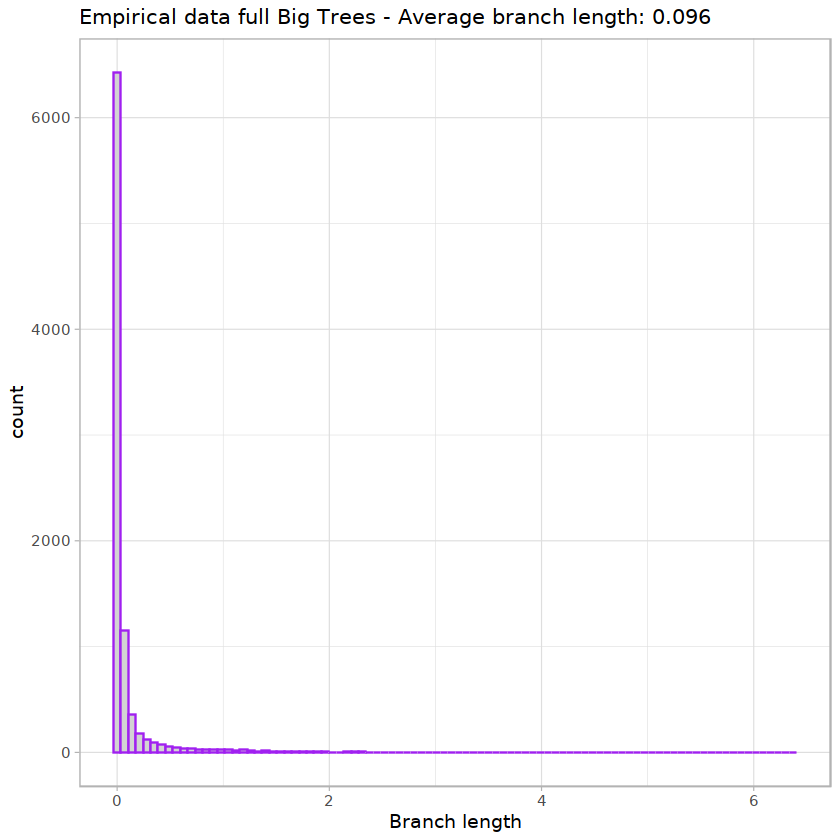

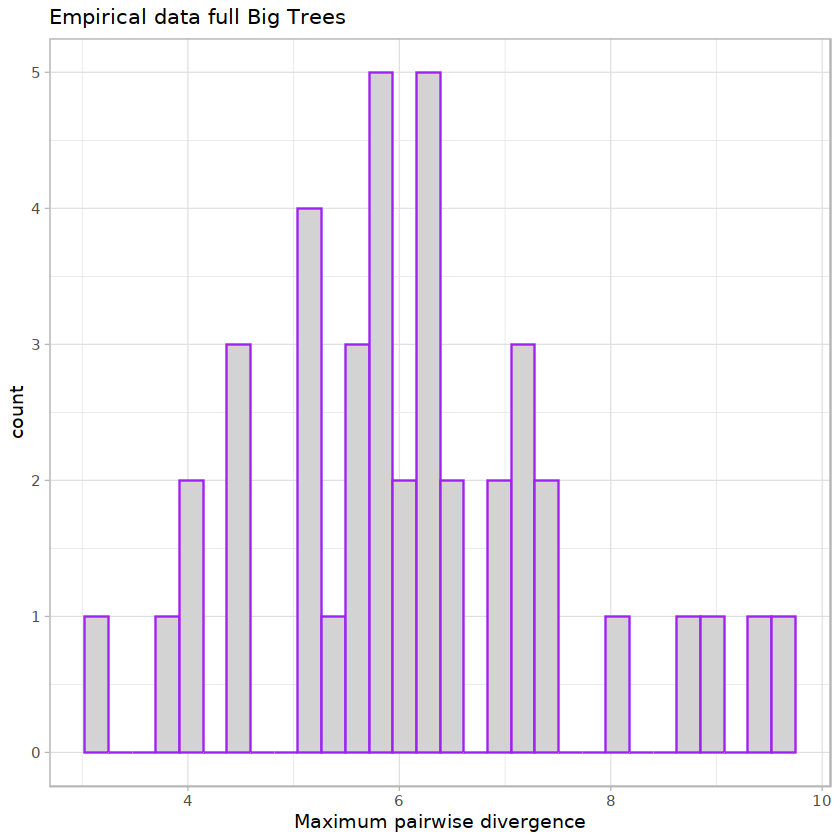

In [7]:

ggplot(as.data.frame(collect_branch_len_full_aln),aes(x=collect_branch_len_full_aln)) +
    geom_histogram(color = "purple", fill = "lightgray",binwidth = 0.07) +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Branch length") + ggtitle(paste0("Empirical data full Big Trees - Average branch length: ", round(mean(collect_branch_len_full_aln),digits = 3)))
                                           
ggplot(as.data.frame(collect_diameter_full_aln),aes(x=collect_diameter_full_aln)) +
    geom_histogram(color = "purple", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Maximum pairwise divergence") + ggtitle(paste0("Empirical data full Big Trees"))


In [10]:
length(collect_branch_len_supermatrix_ml)
length(collect_branch_len)
max(collect_branch_len_full_aln)

[1] 12100

[1] 8470

[1] 6.353587

In [15]:
max(collect_diameter_supermatrix_ml)

[1] 9.812629

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



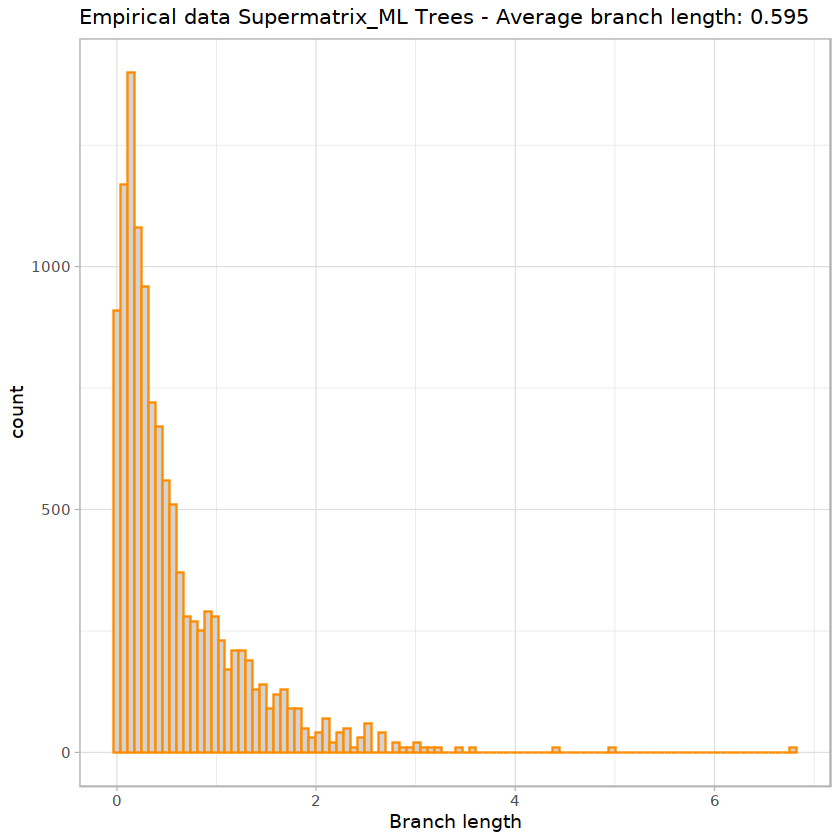

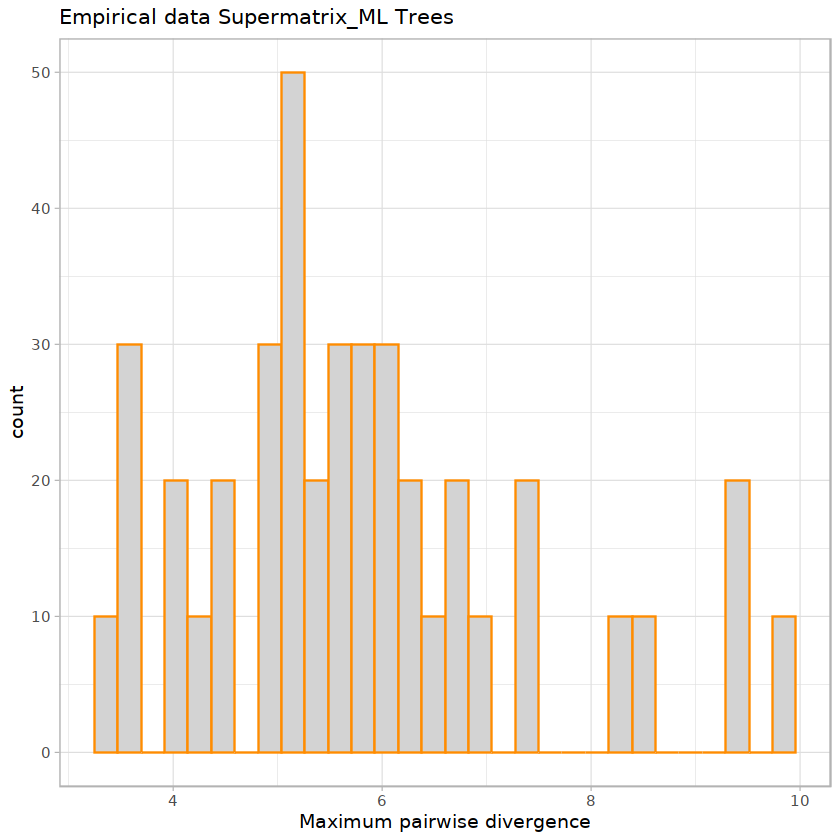

In [53]:
ggplot(as.data.frame(collect_branch_len_supermatrix_ml),aes(x=collect_branch_len_supermatrix_ml)) +
    geom_histogram(color = "darkorange", fill = "lightgray",binwidth = 0.07) +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Branch length") + ggtitle(paste0("Empirical data Supermatrix_ML Trees - Average branch length: ", round(mean(collect_branch_len_supermatrix_ml),digits = 3)))
                                           
ggplot(as.data.frame(collect_diameter_supermatrix_ml),aes(x=collect_diameter_supermatrix_ml)) +
    geom_histogram(color = "darkorange", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Maximum pairwise divergence") + ggtitle(paste0("Empirical data Supermatrix_ML Trees"))
             


In [16]:
max(collect_diameter)

[1] 9.551863

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



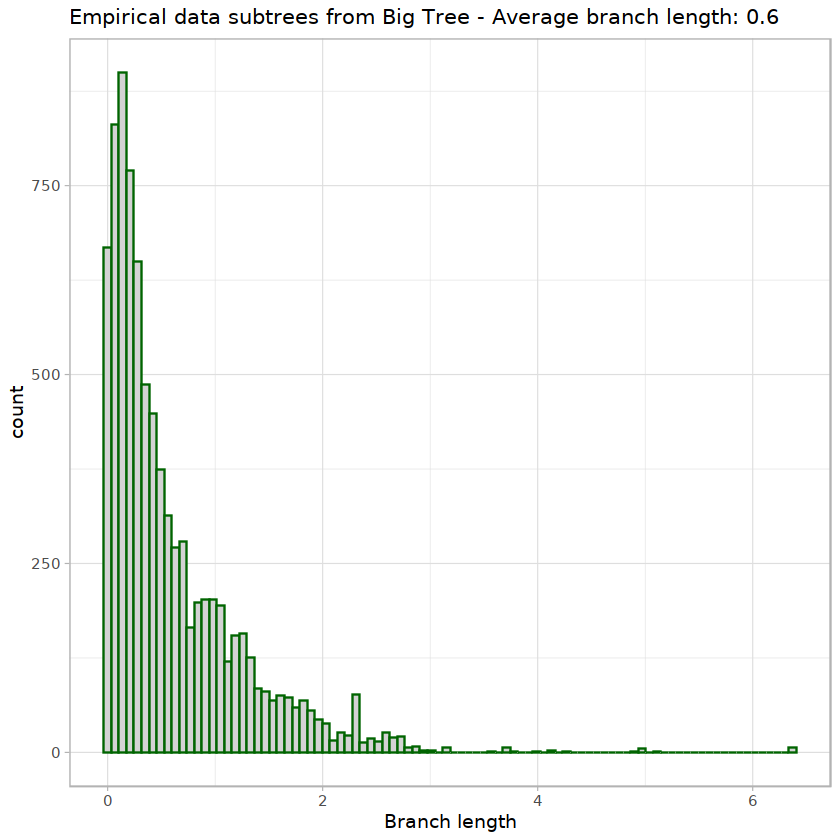

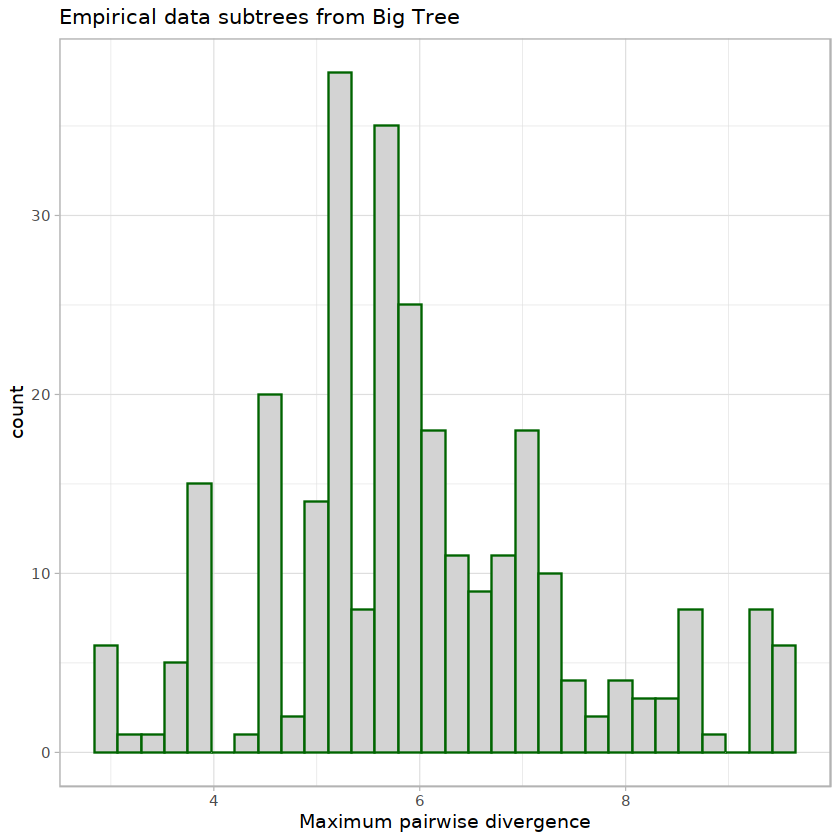

In [54]:
ggplot(as.data.frame(collect_branch_len),aes(x=collect_branch_len)) +
    geom_histogram(color = "darkgreen", fill = "lightgray",binwidth = 0.07) +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Branch length") + ggtitle(paste0("Empirical data subtrees from Big Tree - Average branch length: ", round(mean(collect_branch_len),digits = 3)))
                                           
ggplot(as.data.frame(collect_diameter),aes(x=collect_diameter)) +
    geom_histogram(color = "darkgreen", fill = "lightgray") +
    theme_light() +
    theme(plot.title = element_text(size = 12)) + 
    xlab("Maximum pairwise divergence") + ggtitle(paste0("Empirical data subtrees from Big Tree"))
         


In [6]:
myval = c()
for(i in 1:41){
    test_df = RF_matrices[[i]]
    myval = c(myval,length(which(colSums(test_df[c(1:7),c(1:7)]) != 0)))
}

which(myval != 0)

length(which(myval != 0))

[1]  5 21 41

[1] 3

unit_1,unit_2,unit_3,unit_4,unit_5,unit_6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4813773,0.4252749,0.3943477,0.3688909,0.3500012,0.3413522
0.4813773,0.4558193,0.4220801,0.4013759,0.3896059,0.3771120


Using Type as id variables



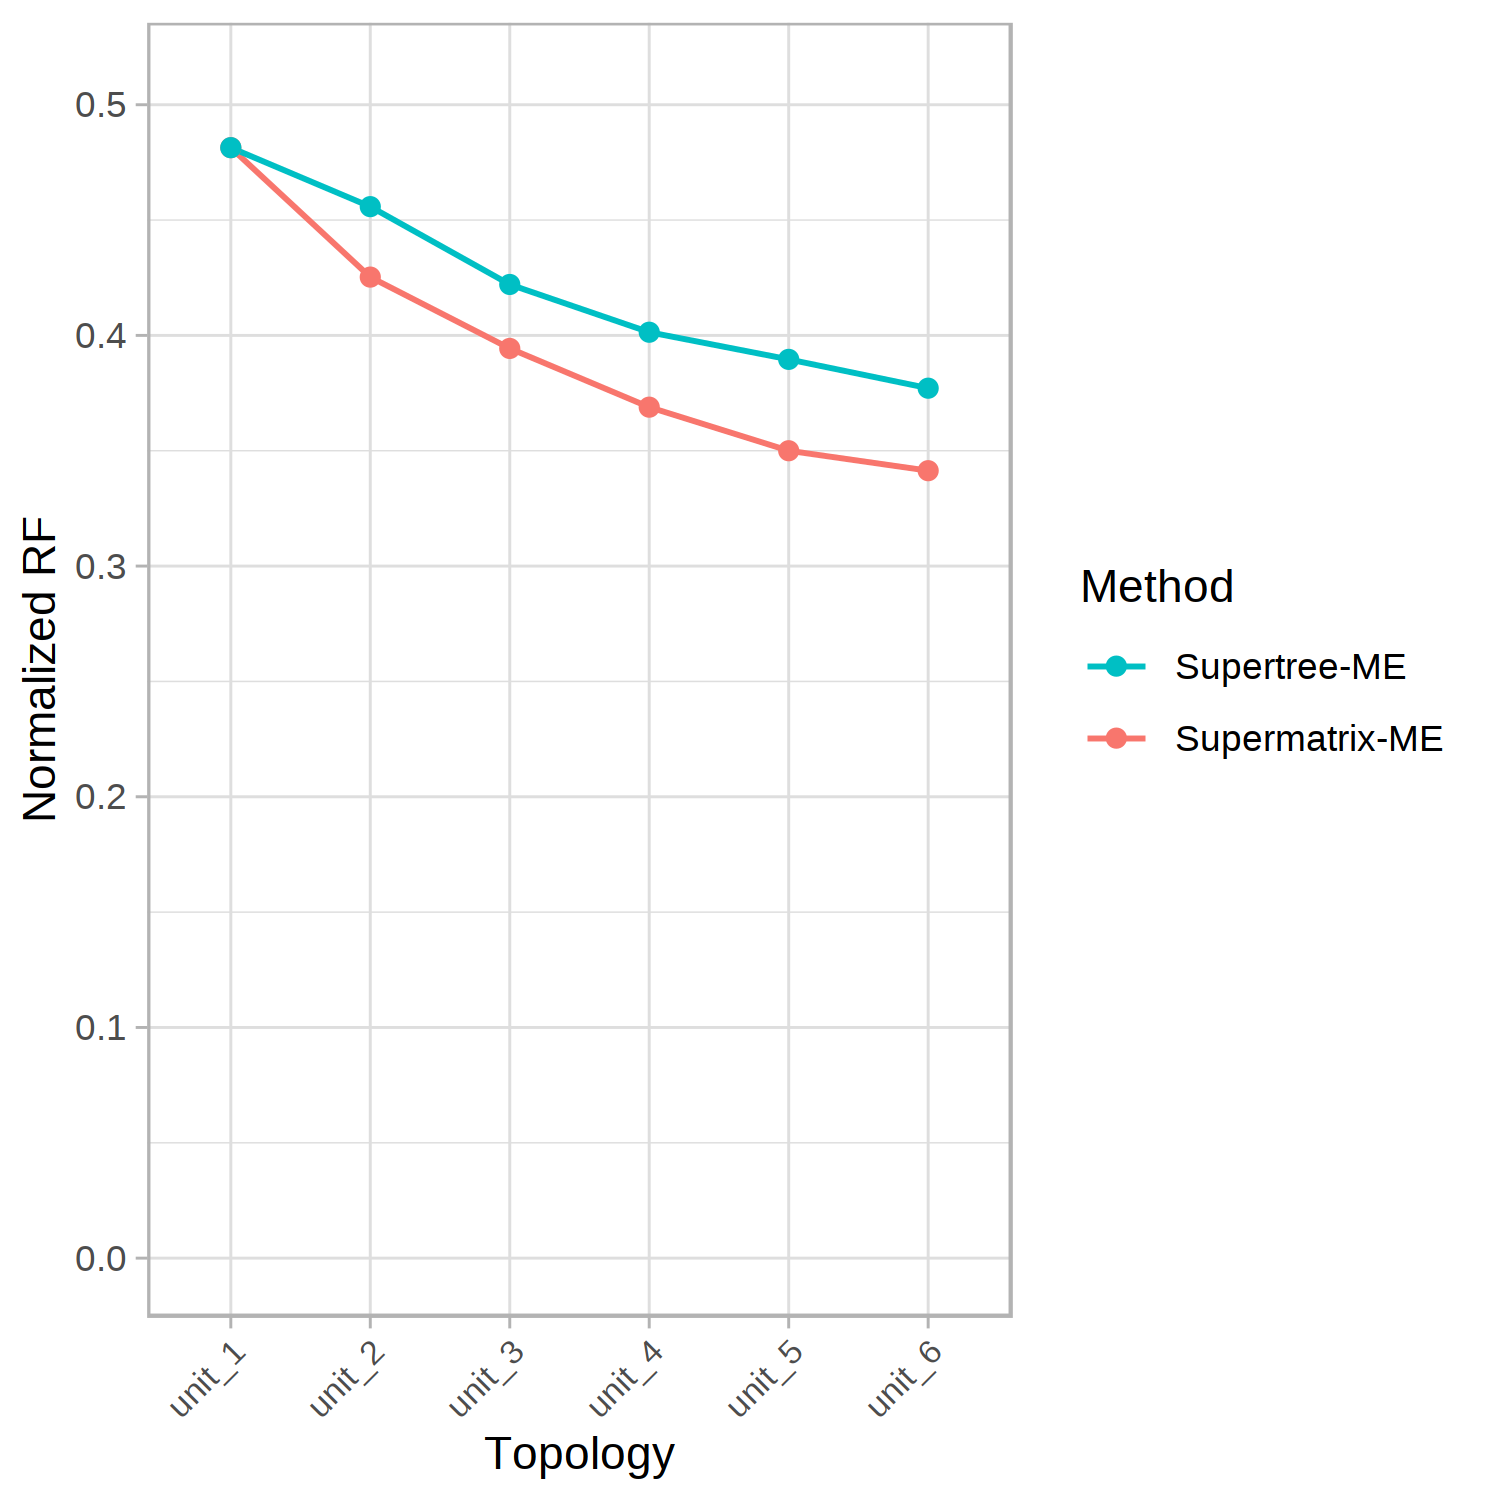

In [38]:
#
# Fig 4 Supermatrix-ME and Supertree-ME VS Big-Tree ML
#


df_mean_rf_me_seq_vs_ml_species_full_ref = as.data.frame(matrix(mean_rf_me_seq_vs_ml_species_full_ref, ncol = 2*num_of_species,  byrow = TRUE))

df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species = df_mean_rf_me_seq_vs_ml_species_full_ref %>%
  group_by(group = gl(n()/7, 7)) %>%
  summarise_all(mean, na.rm = TRUE)

df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species = df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species[,-1]

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 300)

units_names = c()
for (i in 1:num_of_species) {units_names=c(units_names,paste0("unit_",i))}

df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans = as.data.frame(matrix(colMeans(df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species), ncol = num_of_species, byrow = TRUE), stringsAsFactors = FALSE)
colnames(df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans) = units_names[1:6]

df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans
df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans$Type = c("Supermatrix-ME","Supertree-ME")
df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans_melted = melt(df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans)
colnames(df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans_melted) = c("Method","Topology","RF")
p = ggplot(data=df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans_melted, aes(x=Topology, y=RF, group=Method,color=Method)) +
    geom_line() + 
    geom_point() + 
    theme_light() + 
    theme(axis.text.x=element_text(angle = 45, hjust = 1, size = 8),legend.position="right") + 
    ylab("Normalized RF") + xlab("Topology") +
    scale_y_continuous(limits = c(0,0.51)) +
    scale_color_discrete(breaks=c("Supertree-ME","Supermatrix-ME")) + 
    scale_shape_discrete(breaks=c("Supertree-ME","Supermatrix-ME"))
p
ggsave(filename="RF_lineplot_ME_seq_vs_ML_Big_tree.png", plot=p, dpi = "retina", width = 5, height = 5)




In [ ]:
#
# Supermatrix-ML and Supertree-ML VS Big-Tree ML
#


df_mean_rf_ml_seq_vs_ml_species_full_ref = as.data.frame(matrix(mean_rf_ml_seq_vs_ml_species_full_ref, ncol = 2*num_of_species,  byrow = TRUE))

df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species = df_mean_rf_ml_seq_vs_ml_species_full_ref %>%
  group_by(group = gl(n()/7, 7)) %>%
  summarise_all(mean, na.rm = TRUE)

df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species = df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species[,-1]

#options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 300)

units_names = c()
for (i in 1:num_of_species) {units_names=c(units_names,paste0("unit_",i))}

df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans = as.data.frame(matrix(colMeans(df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species), ncol = num_of_species, byrow = TRUE), stringsAsFactors = FALSE)
colnames(df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans) = units_names[1:6]


df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans$Type = c("Supermatrix-ML","Supertree-ML")
df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans_melted = melt(df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans)
colnames(df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans_melted) = c("Method","Topology","RF")
p = ggplot(data=df_mean_rf_ml_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans_melted, aes(x=Topology, y=RF, group=Method,color=Method)) +
    geom_line() + 
    geom_point() + 
    theme_light() + 
    theme(axis.text.x=element_text(angle = 45, hjust = 1, size = 8),legend.position="right") + 
    ylab("Normalized RF") + xlab("Topology") +
    scale_y_continuous(limits = c(0,0.51)) +
    scale_color_discrete(breaks=c("Supertree-ML","Supermatrix-ML")) + 
    scale_shape_discrete(breaks=c("Supertree-ML","Supermatrix-ML"))
p




In [ ]:
#
# Table 2
#

agg_RF_me_seq_vs_ml_species_ref_df_mean_unmelted = dcast(df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species_colmeans_melted,formula = Method~Topology,value.var = "RF")
table2 = data.frame(Method = agg_RF_me_seq_vs_ml_species_ref_df_mean_unmelted$Method,"Unit 1" = round(agg_RF_me_seq_vs_ml_species_ref_df_mean_unmelted$unit_1,digits = 2),"Unit 6" = round(agg_RF_me_seq_vs_ml_species_ref_df_mean_unmelted$unit_6,digits = 2),"Difference" = round(agg_RF_me_seq_vs_ml_species_ref_df_mean_unmelted$unit_1 - agg_RF_me_seq_vs_ml_species_ref_df_mean_unmelted$unit_6,digits = 2))
table2 = table2[order(table2$Difference,decreasing = T),]
table2
write.table(table2, file="Table2_average_RF_diff_empirical_ME_Seq_vs_Big_tree.tsv",quote=FALSE, sep="\t",row.names=FALSE)


In [ ]:
#
# Supp Table 4
#

rf_sub_dataframe_ME = df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species[,c(6,12)]
colnames(rf_sub_dataframe_ME) = c("Supermatrix-ME","Supertree-ME")

fams_supermat_better_than_supert_me = length(which( (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Supertree-ME`) ))
fams_supert_better_than_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Supermatrix-ME`) ))
fams_supert_equal_to_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` == rf_sub_dataframe_ME$`Supermatrix-ME`) ))
total_me = nrow(rf_sub_dataframe_ME)
supertree_vs_supermatrix_ME = c(fams_supermat_better_than_supert_me,fams_supert_better_than_supermat_me,fams_supert_equal_to_supermat_me,total_me)

supp_table4 = as.data.frame(t(data.frame(supertree_vs_supermatrix_ME)))
row.names(supp_table4) = c("ME")
colnames(supp_table4) = c("Supermatrix more accurate than Supertree","Supertree more accurate than Supermatrix","Supermatrix equal to Supertree","Total")
write.table(supp_table4, file="Supp_Table4_supermatrix_vs_supertree_mouse_datasets.tsv",quote=FALSE, sep="\t",row.names=TRUE)
supp_table4

In [ ]:
#
# Supp Fig 4
#


rf_sub_dataframe_ME = df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species[,c(1,6,12)]
colnames(rf_sub_dataframe_ME) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ME$Max = apply(rf_sub_dataframe_ME,1,max)
rf_sub_dataframe_ME$Family = row.names(rf_sub_dataframe_ME)

rf_sub_dataframe_ME$`Unit 1` = rf_sub_dataframe_ME$`Unit 1` / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME$Supertree = rf_sub_dataframe_ME$Supertree / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME$Supermatrix = rf_sub_dataframe_ME$Supermatrix  / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME = subset(rf_sub_dataframe_ME, select = -c(Max))

colnames(rf_sub_dataframe_ME) = c("Unit 1 - ME","Supermatrix-ME","Supertree-ME","Family")
rf_sub_dataframe_ME_melted = melt(rf_sub_dataframe_ME, id = "Family")
colnames(rf_sub_dataframe_ME_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ME_melted = rf_sub_dataframe_ME_melted[order(rf_sub_dataframe_ME_melted$Topology,rf_sub_dataframe_ME_melted$RF),]
mylevels = rf_sub_dataframe_ME_melted$Family[1:41]
rf_sub_dataframe_ME_melted$Family = factor(as.numeric(rf_sub_dataframe_ME_melted$Family),levels=mylevels)
ggplot(rf_sub_dataframe_ME_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile() + 
scale_fill_gradient(name = "relative RF",low = "darkblue", high = "lightyellow") +
theme(panel.background = element_rect(fill = "white",
        colour = "white"),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=5,vjust = 6), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm')
        )
ggsave("Supp_Fig4_heatmap_RF_ME.png",dpi="retina", width = 5, height = 1.5)

In [ ]:
#
# Supp Fig 3
#


agg_RF_me_seq_vs_ml_big_tree_ref_df_sub = df_mean_rf_me_seq_vs_ml_species_full_ref_avg_for_all_species[,c(1:6)]
colnames(agg_RF_me_seq_vs_ml_big_tree_ref_df_sub) = units_names[1:6]
agg_RF_me_seq_vs_ml_big_tree_ref_df_sub$Family = basename(pfam_dirs)
agg_RF_me_seq_vs_ml_big_tree_ref_df_sub_melted = melt(agg_RF_me_seq_vs_ml_big_tree_ref_df_sub)
colnames(agg_RF_me_seq_vs_ml_big_tree_ref_df_sub_melted) = c("Family","Topology","RF")
p = ggplot(data=agg_RF_me_seq_vs_ml_big_tree_ref_df_sub_melted, aes(x=Topology, y=RF, group = 1)) +
    geom_line() + 
    geom_point() +
    theme_light() + 
    theme(axis.text.x=element_text(angle = 45, hjust = 1, size = 8))
l = p + facet_wrap(~ Family)
ggsave(filename="RF_lineplot_ME_seq_vs_ML_Big_tree_per_fam.png", plot=l, dpi = "retina", width = 15, height = 5)



In [ ]:
options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 300)

agg_RF_me_seq_vs_ml_seq_ref_df_sub = agg_RF_me_seq_vs_ml_seq_ref_df[,c(1:6)]
colnames(agg_RF_me_seq_vs_ml_seq_ref_df_sub) = units_names[1:6]
agg_RF_me_seq_vs_ml_seq_ref_df_sub$Family = basename(pfam_dirs)
agg_RF_me_seq_vs_ml_seq_ref_df_sub_melted = melt(agg_RF_me_seq_vs_ml_seq_ref_df_sub)
colnames(agg_RF_me_seq_vs_ml_seq_ref_df_sub_melted) = c("Family","Topology","RF")
p = ggplot(data=agg_RF_me_seq_vs_ml_seq_ref_df_sub_melted, aes(x=Topology, y=RF, group = 1)) +
    geom_line() + 
    geom_point() +
    theme_light() + 
    theme(axis.text.x=element_text(angle = 45, hjust = 1, size = 8))
l = p + facet_wrap(~ Family)
ggsave(filename="RF_lineplot_ME_seq_vs_ML_MOUSE_per_fam.png", plot=l, dpi = "retina", width = 15, height = 5)



In [ ]:

agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted = dcast(agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted,formula = Method~Topology,value.var = "RF")
table2 = data.frame(Method = agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$Method,"Unit 1" = round(agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$unit_1,digits = 2),"Unit 6" = round(agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$unit_6,digits = 2),"Difference" = round(agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$unit_1 - agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$unit_6,digits = 2))
table2 = table2[order(table2$Difference,decreasing = T),]
table2
write.table(table2, file="Table2_average_RF_diff_mouse.tsv",quote=FALSE, sep="\t",row.names=FALSE)


In [ ]:
#
# Wilcoxon Test on Supermatrix-ME-Unit-25 and Supermatrix-ML-Unit-25
#

res_wilcox = wilcox.test(agg_RF_me_seq_vs_ml_seq_ref_df[,c(6)],agg_RF_me_seq_vs_ml_seq_ref_df[,c(12)],paired = FALSE,exact = FALSE)
round(res_wilcox$p.value,digits = 8)


In [ ]:
rf_sub_dataframe_ME = agg_RF_me_seq_vs_ml_seq_ref_df[,c(6,12)]
colnames(rf_sub_dataframe_ME) = c("Supermatrix-ME","Supertree-ME")

fams_supermat_better_than_supert_me = length(which( (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Supertree-ME`) ))
fams_supert_better_than_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Supermatrix-ME`) ))
fams_supert_equal_to_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` == rf_sub_dataframe_ME$`Supermatrix-ME`) ))
total_me = rf_sub_dataframe_ME = agg_RF_me_seq_vs_ml_seq_ref_df[,c(6,12)]
colnames(rf_sub_dataframe_ME) = c("Supermatrix-ME","Supertree-ME")

fams_supermat_better_than_supert_me = length(which( (rf_sub_dataframe_ME$`Supermatrix-ME` < rf_sub_dataframe_ME$`Supertree-ME`) ))
fams_supert_better_than_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` < rf_sub_dataframe_ME$`Supermatrix-ME`) ))
fams_supert_equal_to_supermat_me = length(which( (rf_sub_dataframe_ME$`Supertree-ME` == rf_sub_dataframe_ME$`Supermatrix-ME`) ))
total_me = nrow(rf_sub_dataframe_ME)
supertree_vs_supermatrix_ME = c(fams_supermat_better_than_supert_me,fams_supert_better_than_supermat_me,fams_supert_equal_to_supermat_me,total_me)

supp_table4 = as.data.frame(t(data.frame(supertree_vs_supermatrix_ME)))
row.names(supp_table4) = c("ME")
colnames(supp_table4) = c("Supermatrix more accurate than Supertree","Supertree more accurate than Supermatrix","Supermatrix equal to Supertree","Total")
write.table(supp_table4, file="Supp_Table4_supermatrix_vs_supertree_mouse_datasets.tsv",quote=FALSE, sep="\t",row.names=TRUE)
supp_table4nrow(rf_sub_dataframe_ME)
supertree_vs_supermatrix_ME = c(fams_supermat_better_than_supert_me,fams_supert_better_than_supermat_me,fams_supert_equal_to_supermat_me,total_me)

supp_table4 = as.data.frame(t(data.frame(supertree_vs_supermatrix_ME)))
row.names(supp_table4) = c("ME")
colnames(supp_table4) = c("Supermatrix more accurate than Supertree","Supertree more accurate than Supermatrix","Supermatrix equal to Supertree","Total")
write.table(supp_table4, file="Supp_Table4_supermatrix_vs_supertree_mouse_datasets.tsv",quote=FALSE, sep="\t",row.names=TRUE)
supp_table4


In [ ]:
basename(pfam_dirs)


In [ ]:
options(repr.plot.width = 5, repr.plot.height = 1.5, repr.plot.res = 300)

rf_sub_dataframe_ME = agg_RF_me_seq_vs_ml_seq_ref_df[,c(1,6,12)]
colnames(rf_sub_dataframe_ME) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ME$Max = apply(rf_sub_dataframe_ME,1,max)
rf_sub_dataframe_ME$Family = row.names(rf_sub_dataframe_ME)

rf_sub_dataframe_ME$`Unit 1` = rf_sub_dataframe_ME$`Unit 1` / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME$Supertree = rf_sub_dataframe_ME$Supertree / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME$Supermatrix = rf_sub_dataframe_ME$Supermatrix  / rf_sub_dataframe_ME$Max
rf_sub_dataframe_ME = subset(rf_sub_dataframe_ME, select = -c(Max))

colnames(rf_sub_dataframe_ME) = c("Unit 1 - ME","Supermatrix-ME","Supertree-ME","Family")
rf_sub_dataframe_ME_melted = melt(rf_sub_dataframe_ME, id = "Family")
colnames(rf_sub_dataframe_ME_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ME_melted = rf_sub_dataframe_ME_melted[order(rf_sub_dataframe_ME_melted$Topology,rf_sub_dataframe_ME_melted$RF),]
mylevels = rf_sub_dataframe_ME_melted$Family[1:41]
rf_sub_dataframe_ME_melted$Family = factor(as.numeric(rf_sub_dataframe_ME_melted$Family),levels=mylevels)
ggplot(rf_sub_dataframe_ME_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile() + 
scale_fill_gradient(name = "relative RF",low = "darkblue", high = "lightyellow") +
theme(panel.background = element_rect(fill = "white",
        colour = "white"),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=5,vjust = 6), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm')
        )
ggsave("Supp_Fig3_heatmap_RF_ME.png",dpi="retina", width = 5, height = 1.5)

In [ ]:
#
# Redo the RF plot for datasets including RAT MSAs or not
#

options(repr.plot.width = 20, repr.plot.height = 6, repr.plot.res = 300)

units_names = c()
for (i in 1:num_of_species) {units_names=c(units_names,paste0("unit_",i))}

agg_RF_me_seq_vs_ml_seq_ref_df = as.data.frame(matrix(agg_RF_me_seq_vs_ml_seq_ref, ncol = 2*num_of_species,  byrow = TRUE), stringsAsFactors = FALSE)
fams_with_rat = read.table(file = "fams_with_rat.txt")
fams_without_rat = read.table(file = "fams_without_rat.txt")
row.names(agg_RF_me_seq_vs_ml_seq_ref_df) = basename(pfam_dirs)
#agg_RF_me_seq_vs_ml_seq_ref_df_with_rat = agg_RF_me_seq_vs_ml_seq_ref_df[is.element(row.names(agg_RF_me_seq_vs_ml_seq_ref_df), fams_with_rat$V1),]
agg_RF_me_seq_vs_ml_seq_ref_df_without_rat = agg_RF_me_seq_vs_ml_seq_ref_df[is.element(row.names(agg_RF_me_seq_vs_ml_seq_ref_df), fams_without_rat$V1),]


agg_RF_me_seq_vs_ml_seq_ref_df_mean = as.data.frame(matrix(colMeans(agg_RF_me_seq_vs_ml_seq_ref_df_without_rat), ncol = num_of_species, byrow = TRUE), stringsAsFactors = FALSE)
colnames(agg_RF_me_seq_vs_ml_seq_ref_df_mean) = units_names[1:6]



agg_RF_me_seq_vs_ml_seq_ref_df_mean$Type = c("Supermatrix-ME-Seq","Supertree-ME-Seq")
agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted = melt(agg_RF_me_seq_vs_ml_seq_ref_df_mean)
colnames(agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted) = c("Method","Topology","RF")
p = ggplot(data=agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted, aes(x=Topology, y=RF, group=Method,color=Method)) +
    geom_line() + 
    geom_point() + 
    theme_light() + 
    ylab("Normalized RF") + xlab("Topology") + ggtitle("ME-Seq with ML-MOUSE as a reference without RAT") +
    scale_color_discrete(breaks=c("Supertree-ME-Seq","Supermatrix-ME-Seq")) + 
    scale_shape_discrete(breaks=c("Supertree-ME-Seq","Supermatrix-ME-Seq")) +
    facet_zoom(ylim = c(0.25,0.55))
#ggsave("RF_lineplot_per_unit_ref_ME.png",dpi = "retina")

p0 <- p
p1 <- p + scale_y_continuous(limits = c(0, 1))

# convert ggplot objects to form suitable for rendering
gp0 <- ggplot_build(p0)
gp1 <- ggplot_build(p1)

# re-set zoomed facet's limits to match zoomed range
k <- gp1$layout$layout$SCALE_Y[gp1$layout$layout$name == "y"]
gp1$layout$panel_scales_y[[k]]$limits <- gp1$layout$panel_scales_y[[k]]$range$range 

# re-set zoomed facet's panel parameters based on original version p0
k <- gp1$layout$layout$PANEL[gp1$layout$layout$name == "y"]
gp1$layout$panel_params[[k]] <- gp0$layout$panel_params[[k]]

# convert built ggplot object to gtable of grobs as usual & print result
gt1 <- ggplot_gtable(gp1)
grid.draw(gt1)

#ggsave(filename="RF_lineplot_ME_seq_vs_ML_MOUSE.png", plot=gt1, dpi = "retina", width = 20, height = 6)

#grid.arrange(p,j)


In [ ]:
#
# Compute RF distances between Mouse-ME and Mouse-ML trees
#


pfam_dirs = grep("PF*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
seq_prefix = "results/tcoffee/"

collect_rf_mouse_me_and_mouse_ml_trees = c()

for (family in pfam_dirs) {
    family = basename(family)
    #family = "PF12796"
    setwd(basename(family))
    codefile = read.table(file = paste0(seq_prefix,"file.code_name"))
    
    seq_tree <- read.tree(file=paste0(seq_prefix,family,".MOUSE_domain_sequences_after_intersection_coded.phylip_fastme_tree.nwk"),keep.multi=FALSE)
    for (j in 1:length(seq_tree$tip.label)) { seq_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == seq_tree[["tip.label"]][j])])}
    seq_tree_cp = seq_tree
    for (j in 1:length(seq_tree$tip.label)) { seq_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == seq_tree[["tip.label"]][j])])}
    seq_tree=list(seq_tree)
    class(seq_tree)="multiPhylo"

    seq_raxml_tree <- read.tree(file=paste0(seq_prefix,"RAxML_bestTree.",family,".MOUSE_domain_sequences_after_intersection_coded_raxml.nwk"),keep.multi=FALSE)
    for (j in 1:length(seq_raxml_tree$tip.label)) { seq_raxml_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == seq_raxml_tree[["tip.label"]][j])])}
    seq_raxml_tree_cp = seq_raxml_tree
    for (j in 1:length(seq_raxml_tree$tip.label)) { seq_raxml_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == seq_raxml_tree[["tip.label"]][j])])}
    seq_raxml_tree=list(seq_raxml_tree)
    class(seq_raxml_tree)="multiPhylo"
    
    mouse_me_and_mouse_ml_trees = c(seq_tree,seq_raxml_tree)
    
    rf_mouse_me_and_mouse_ml_trees = RF.dist(mouse_me_and_mouse_ml_trees,normalize=TRUE)
    rf_mouse_me_and_mouse_ml_trees_data = data.matrix(rf_mouse_me_and_mouse_ml_trees)
    
    collect_rf_mouse_me_and_mouse_ml_trees = c(collect_rf_mouse_me_and_mouse_ml_trees,rf_mouse_me_and_mouse_ml_trees_data[2])

    setwd("..")
}
mean(collect_rf_mouse_me_and_mouse_ml_trees)


In [ ]:
#
# Compute RF distances with Mouse MSAs and structure-based MSAs
#

pfam_dirs = grep("PF*",list.dirs(path = ".",recursive = FALSE),value = TRUE)

seq_prefix = "results/tcoffee/"
struct_prefix = "results/3DCoffee/"

total_rf_me_seq_vs_ml_seq_ref = list()
total_rf_me_struct_vs_ml_seq_ref = list()
total_rf_ml_seq_vs_ml_struct_ref = list()
agg_RF_me_seq_vs_ml_seq_ref = c()
agg_RF_me_struct_vs_ml_seq_ref = c()
agg_RF_ml_seq_vs_ml_struct_ref = c()

for (family in pfam_dirs) {
    family = basename(family)
    #family = "PF12796"
    setwd(basename(family))
    codefile = read.table(file = paste0(seq_prefix,"file.code_name"))
    orgs<-read.table(file = paste0(family,".orthologs_org_ids_to_concatenate"))

    #
    # Read ME and ML supermatrix and supertree trees and reference ME and ML for seq and struct MOUSE trees
    #
    
    
    all_units_trees_seq <- read.tree(paste0(seq_prefix,"/all_units.nwk"),keep.multi=TRUE)
    all_units_trees_seq <- multi2di(all_units_trees_seq)
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_trees[[x]][["tip.label"]][j])])}}

    all_units_raxml_trees_seq <- read.tree(paste0(seq_prefix,"all_units_RAxML_trees.nwk"),keep.multi=TRUE)
    all_units_raxml_trees_seq <- multi2di(all_units_raxml_trees_seq)
    #for(x in 1:length(all_units_raxml_trees)) { for (j in 1:length(all_units_raxml_trees[[x]]$tip.label)) { all_units_raxml_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_trees[[x]][["tip.label"]][j])])}}

    all_units_superfine_trees_seq <- read.tree(paste0(seq_prefix,"all_units_superfine_trees.nwk"),keep.multi=TRUE)
    all_units_superfine_trees_seq <- multi2di(all_units_superfine_trees_seq)    
    #for(x in 1:length(all_units_superfine_trees)) { for (j in 1:length(all_units_superfine_trees[[x]]$tip.label)) { all_units_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_superfine_trees[[x]][["tip.label"]][j])])}}

    all_units_raxml_superfine_trees_seq <- read.tree(paste0(seq_prefix,"all_units_RAxML_superfine_trees.nwk"),keep.multi=TRUE)
    all_units_raxml_superfine_trees_seq <- multi2di(all_units_raxml_superfine_trees_seq)        
    #for(x in 1:length(all_units_raxml_superfine_trees)) { for (j in 1:length(all_units_raxml_superfine_trees[[x]]$tip.label)) { all_units_raxml_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_superfine_trees[[x]][["tip.label"]][j])])}}
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == all_units_trees[[x]][["tip.label"]][j])])}}

    tmalign1d_tree <- read.tree(file=paste0(struct_prefix,family,".MOUSE_domain_sequences_after_intersection_tmalign_colabfold_coded.phylip_fastme_tree.nwk"),keep.multi=FALSE)
    for (j in 1:length(tmalign1d_tree$tip.label)) { tmalign1d_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == tmalign1d_tree[["tip.label"]][j])])}
    tmalign1d_tree_cp = tmalign1d_tree
    for (j in 1:length(tmalign1d_tree$tip.label)) { tmalign1d_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == tmalign1d_tree[["tip.label"]][j])])}
    tmalign1d_tree=list(tmalign1d_tree)
    class(tmalign1d_tree)="multiPhylo"

    tmalign1d_raxml_tree <- read.tree(file=paste0(struct_prefix,"RAxML_bestTree.",family,".MOUSE_domain_sequences_after_intersection_tmalign_colabfold_coded_raxml.nwk"),keep.multi=FALSE)
    for (j in 1:length(tmalign1d_raxml_tree$tip.label)) { tmalign1d_raxml_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == tmalign1d_raxml_tree[["tip.label"]][j])])}
    tmalign1d_raxml_tree_cp = tmalign1d_raxml_tree
    for (j in 1:length(tmalign1d_raxml_tree$tip.label)) { tmalign1d_raxml_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == tmalign1d_raxml_tree[["tip.label"]][j])])}
    tmalign1d_raxml_tree=list(tmalign1d_raxml_tree)
    class(tmalign1d_raxml_tree)="multiPhylo"
    
    all_units_trees_struct <- read.tree(paste0(struct_prefix,"/all_units.nwk"),keep.multi=TRUE)
    all_units_trees_struct <- multi2di(all_units_trees_struct)
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_trees[[x]][["tip.label"]][j])])}}

    all_units_raxml_trees_struct <- read.tree(paste0(struct_prefix,"all_units_RAxML_trees.nwk"),keep.multi=TRUE)
    all_units_raxml_trees_struct <- multi2di(all_units_raxml_trees_struct)
    #for(x in 1:length(all_units_raxml_trees)) { for (j in 1:length(all_units_raxml_trees[[x]]$tip.label)) { all_units_raxml_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_trees[[x]][["tip.label"]][j])])}}

    all_units_superfine_trees_struct <- read.tree(paste0(struct_prefix,"all_units_superfine_trees.nwk"),keep.multi=TRUE)
    all_units_superfine_trees_struct <- multi2di(all_units_superfine_trees_struct)    
    #for(x in 1:length(all_units_superfine_trees)) { for (j in 1:length(all_units_superfine_trees[[x]]$tip.label)) { all_units_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_superfine_trees[[x]][["tip.label"]][j])])}}

    all_units_raxml_superfine_trees_struct <- read.tree(paste0(struct_prefix,"all_units_RAxML_superfine_trees.nwk"),keep.multi=TRUE)
    all_units_raxml_superfine_trees_struct <- multi2di(all_units_raxml_superfine_trees_struct)        
    #for(x in 1:length(all_units_raxml_superfine_trees)) { for (j in 1:length(all_units_raxml_superfine_trees[[x]]$tip.label)) { all_units_raxml_superfine_trees[[x]]$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == all_units_raxml_superfine_trees[[x]][["tip.label"]][j])])}}
    #for(x in 1:length(all_units_trees)) { for (j in 1:length(all_units_trees[[x]]$tip.label)) { all_units_trees[[x]]$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == all_units_trees[[x]][["tip.label"]][j])])}}

    seq_tree <- read.tree(file=paste0(seq_prefix,family,".MOUSE_domain_sequences_after_intersection_coded.phylip_fastme_tree.nwk"),keep.multi=FALSE)
    for (j in 1:length(seq_tree$tip.label)) { seq_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == seq_tree[["tip.label"]][j])])}
    seq_tree_cp = seq_tree
    for (j in 1:length(seq_tree$tip.label)) { seq_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == seq_tree[["tip.label"]][j])])}
    seq_tree=list(seq_tree)
    class(seq_tree)="multiPhylo"

    seq_raxml_tree <- read.tree(file=paste0(seq_prefix,"RAxML_bestTree.",family,".MOUSE_domain_sequences_after_intersection_coded_raxml.nwk"),keep.multi=FALSE)
    for (j in 1:length(seq_raxml_tree$tip.label)) { seq_raxml_tree$tip.label[j] = as.character(codefile$V1[which(codefile$V2 == seq_raxml_tree[["tip.label"]][j])])}
    seq_raxml_tree_cp = seq_raxml_tree
    for (j in 1:length(seq_raxml_tree$tip.label)) { seq_raxml_tree$tip.label[j] = as.character(codefile$V2[which(codefile$V1 == seq_raxml_tree[["tip.label"]][j])])}
    seq_raxml_tree=list(seq_raxml_tree)
    class(seq_raxml_tree)="multiPhylo"
    
    
    #
    # ME seq vs ML seq
    #

    me_seq_vs_ml_seq_ref = c(seq_raxml_tree,all_units_trees_seq,all_units_superfine_trees_seq)
    class(me_seq_vs_ml_seq_ref)="multiPhylo"
    rf_me_seq_vs_ml_seq_ref = RF.dist(me_seq_vs_ml_seq_ref,normalize=TRUE)
    rf_me_seq_vs_ml_seq_ref_data =data.matrix(rf_me_seq_vs_ml_seq_ref)
    
    mean_rf_me_seq_vs_ml_seq_ref = c()
    se_rf_me_seq_vs_ml_seq_ref = c()
    
    for (i in seq(2,(length(orgs$V1)*10*2)+1,by=10)) {
        only_with_ref = rf_me_seq_vs_ml_seq_ref_data[1,]
        mean_rf_me_seq_vs_ml_seq_ref = c(mean_rf_me_seq_vs_ml_seq_ref,mean(only_with_ref[i:(i+9)]))
        se_rf_me_seq_vs_ml_seq_ref =c(se_rf_me_seq_vs_ml_seq_ref,(sd(only_with_ref[i:(i+9)]/sqrt(10))))
    }


    units_names = c()
    for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("unit_",i))}
    units_names_init=c(units_names,units_names)
    units_names = units_names_init
    
    mydf2 = data.frame(units_names,mean_rf_me_seq_vs_ml_seq_ref,se_rf_me_seq_vs_ml_seq_ref)
    mydf2$units_names = as.character(mydf2$units_names)
    mydf2$units_names = factor(mydf2$units_names, levels=unique(mydf2$units_names))
    
    ex_mydf2 = mydf2[,2]
    ex_mydf2 = c(family,ex_mydf2[c(1, length(orgs$V1), length(orgs$V1)+1, length(orgs$V1)*2)])
    agg_RF_me_seq_vs_ml_seq_ref = c(agg_RF_me_seq_vs_ml_seq_ref,mean_rf_me_seq_vs_ml_seq_ref)
    total_rf_me_seq_vs_ml_seq_ref = list.append(total_rf_me_seq_vs_ml_seq_ref,ex_mydf2)
    #write.table(ex_mydf2,file = paste0(family,"_RF_ref_",units_names_init[index],".tsv"),sep="\t",quote=FALSE,row.names=FALSE, col.names=FALSE)

    #mydf2$Tree_type = c("Struct_ref",rep("Supermatrix_ME",7),rep("Supermatrix_ML",7),rep("Supertree_ME",7),rep("Supertree_ML",7))
    #j = ggplot(mydf2[-c(1),], aes(x=units_names,y=mean_rf,color=Tree_type,group=Tree_type)) + geom_line() + theme_ipsum() + theme(axis.text.x = element_text(angle = 45)) + ylab("Normalised RF")+xlab("Topology")+scale_x_discrete(breaks=mydf2$units_names)+coord_cartesian(ylim=c(0,1))+ggtitle(paste0("Reference ",units_names_init[index])) # geom_bar(stat="identity", position=position_dodge(),width=0.4) + geom_errorbar(aes(ymin=mean_rf-2*se_rf,ymax=mean_rf+2*se_rf)) +scale_y_continuous(breaks = seq(0, 1, by = 0.1)) +geom_line(group=1,size=1)
    #plot_title = paste0(family,"_RF_ref_",units_names_init[index],".png")
    #ggsave(file=plot_title,dpi = "retina")
    
    #
    # ME struct vs ML seq
    #

    me_struct_vs_ml_seq_ref = c(seq_raxml_tree,all_units_trees_struct,all_units_superfine_trees_struct)
    class(me_struct_vs_ml_seq_ref)="multiPhylo"
    
    rf_me_struct_vs_ml_seq_ref = RF.dist(me_struct_vs_ml_seq_ref,normalize=TRUE)
    rf_me_struct_vs_ml_seq_ref_data =data.matrix(rf_me_struct_vs_ml_seq_ref)
    
    mean_rf_me_struct_vs_ml_seq_ref = c()
    se_rf_me_struct_vs_ml_seq_ref = c()
    
    for (i in seq(2,(length(orgs$V1)*10*2)+1,by=10)) {
        only_with_ref = rf_me_struct_vs_ml_seq_ref_data[1,]
        mean_rf_me_struct_vs_ml_seq_ref = c(mean_rf_me_struct_vs_ml_seq_ref,mean(only_with_ref[i:(i+9)]))
        se_rf_me_struct_vs_ml_seq_ref =c(se_rf_me_struct_vs_ml_seq_ref,(sd(only_with_ref[i:(i+9)]/sqrt(10))))
    }


    units_names = c()
    for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("unit_",i))}
    units_names_init=c(units_names,units_names)
    units_names = units_names_init
    
    mydf2 = data.frame(units_names,mean_rf_me_seq_vs_ml_seq_ref,se_rf_me_seq_vs_ml_seq_ref)
    mydf2$units_names = as.character(mydf2$units_names)
    mydf2$units_names = factor(mydf2$units_names, levels=unique(mydf2$units_names))
    
    ex_mydf2 = mydf2[,2]
    ex_mydf2 = c(family,ex_mydf2[c(1, length(orgs$V1), length(orgs$V1)+1, length(orgs$V1)*2)])
    agg_RF_me_struct_vs_ml_seq_ref = c(agg_RF_me_struct_vs_ml_seq_ref,mean_rf_me_struct_vs_ml_seq_ref)
    total_rf_me_struct_vs_ml_seq_ref = list.append(total_rf_me_struct_vs_ml_seq_ref,ex_mydf2)
    
    #
    # ML seq vs ML struct
    #

    ml_seq_vs_ml_struct_ref = c(tmalign1d_raxml_tree,all_units_raxml_trees_seq,all_units_raxml_superfine_trees_seq)
    class(ml_seq_vs_ml_struct_ref)="multiPhylo"

    rf_ml_seq_vs_ml_struct_ref = RF.dist(ml_seq_vs_ml_struct_ref,normalize=TRUE)
    rf_ml_seq_vs_ml_struct_ref_data =data.matrix(rf_ml_seq_vs_ml_struct_ref)
    
    mean_rf_ml_seq_vs_ml_struct_ref = c()
    se_rf_ml_seq_vs_ml_struct_ref = c()
    
    for (i in seq(2,(length(orgs$V1)*10*2)+1,by=10)) {
        only_with_ref = rf_ml_seq_vs_ml_struct_ref_data[1,]
        mean_rf_ml_seq_vs_ml_struct_ref = c(mean_rf_ml_seq_vs_ml_struct_ref,mean(only_with_ref[i:(i+9)]))
        se_rf_ml_seq_vs_ml_struct_ref =c(se_rf_ml_seq_vs_ml_struct_ref,(sd(only_with_ref[i:(i+9)]/sqrt(10))))
    }


    units_names = c()
    for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("unit_",i))}
    units_names_init=c(units_names,units_names)
    units_names = units_names_init
    
    mydf2 = data.frame(units_names,mean_rf_me_seq_vs_ml_seq_ref,se_rf_me_seq_vs_ml_seq_ref)
    mydf2$units_names = as.character(mydf2$units_names)
    mydf2$units_names = factor(mydf2$units_names, levels=unique(mydf2$units_names))
    
    ex_mydf2 = mydf2[,2]
    ex_mydf2 = c(family,ex_mydf2[c(1, length(orgs$V1), length(orgs$V1)+1, length(orgs$V1)*2)])
    agg_RF_ml_seq_vs_ml_struct_ref = c(agg_RF_ml_seq_vs_ml_struct_ref,mean_rf_ml_seq_vs_ml_struct_ref)
    total_rf_ml_seq_vs_ml_struct_ref = list.append(total_rf_ml_seq_vs_ml_struct_ref,ex_mydf2)
    
    setwd("..")
}
    

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 6, repr.plot.res = 300)

units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("unit_",i))}

agg_RF_me_seq_vs_ml_seq_ref_df = as.data.frame(matrix(agg_RF_me_seq_vs_ml_seq_ref, ncol = 2*length(orgs$V1),  byrow = TRUE), stringsAsFactors = FALSE)
agg_RF_me_seq_vs_ml_seq_ref_df_mean = as.data.frame(matrix(colMeans(agg_RF_me_seq_vs_ml_seq_ref_df), ncol = length(orgs$V1), byrow = TRUE), stringsAsFactors = FALSE)
colnames(agg_RF_me_seq_vs_ml_seq_ref_df_mean) = units_names[1:7]

agg_RF_me_seq_vs_ml_seq_ref_df_mean$Type = c("Supermatrix-ME-Seq","Supertree-ME-Seq")
agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted = melt(agg_RF_me_seq_vs_ml_seq_ref_df_mean)
colnames(agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted) = c("Method","Topology","RF")
p = ggplot(data=agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted, aes(x=Topology, y=RF, group=Method,color=Method)) +
    geom_line() + 
    geom_point() + 
    theme_light() + 
    ylab("Normalized RF") + xlab("Topology") + ggtitle("ME-Seq with ML-MOUSE as a reference") +
    scale_y_continuous(limits = c(0,0.5)) +
    scale_color_discrete(breaks=c("Supertree-ME-Seq","Supermatrix-ME-Seq")) + 
    scale_shape_discrete(breaks=c("Supertree-ME-Seq","Supermatrix-ME-Seq")) +

ggsave(filename="RF_lineplot_ME_seq_vs_ML_MOUSE.png", plot=gt1, dpi = "retina", width = 20, height = 6)


In [ ]:

agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted = dcast(agg_RF_me_seq_vs_ml_seq_ref_df_mean_melted,formula = Method~Topology,value.var = "RF")
table2 = data.frame(Method = agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$Method,"Unit 1" = round(agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$unit_1,digits = 2),"Unit 7" = round(agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$unit_7,digits = 2),"Difference" = round(agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$unit_1 - agg_RF_me_seq_vs_ml_seq_ref_df_mean_unmelted$unit_7,digits = 2))
table2 = table2[order(table2$Difference,decreasing = T),]
table2
write.table(table2, file="Table2_average_RF_diff_mouse.tsv",quote=FALSE, sep="\t",row.names=FALSE)


In [ ]:
total_rf_me_seq_vs_ml_seq_ref_df = as.data.frame(do.call(rbind,total_rf_me_seq_vs_ml_seq_ref))
test = as.data.frame(t(apply(ttotal_rf_me_seq_vs_ml_seq_ref_df[,2:5],1, as.numeric)))
total_rf_me_seq_vs_ml_seq_ref_df[,2:5] = round(test,digits=2)
colnames(total_rf_me_seq_vs_ml_seq_ref_df) = c("Family","Unit_1_Supermatrix_ME_Seq","Unit_7_Supermatrix_ME_Seq","Unit_1_Supertree_ME_Seq","Unit_7_Supertree_ME_Seq")
write.table(total_rf_me_seq_vs_ml_seq_ref_df,file = "RF_ME_Seq_with_ref_ML_Seq.tsv",sep="\t",quote=FALSE,row.names=FALSE, col.names=TRUE)


In [ ]:

agg_RF_me_struct_vs_ml_seq_ref_df = as.data.frame(matrix(agg_RF_me_struct_vs_ml_seq_ref, ncol = 2*length(orgs$V1),  byrow = TRUE), stringsAsFactors = FALSE)
agg_RF_me_struct_vs_ml_seq_ref_df_mean = as.data.frame(matrix(colMeans(agg_RF_me_struct_vs_ml_seq_ref_df), ncol = length(orgs$V1), byrow = TRUE), stringsAsFactors = FALSE)
colnames(agg_RF_me_struct_vs_ml_seq_ref_df_mean) = units_names[1:7]
agg_RF_me_struct_vs_ml_seq_ref_df_mean$Type = c("Supermatrix-ME-Struct","Supertree-ME-Struct")
agg_RF_me_struct_vs_ml_seq_ref_df_mean_melted = melt(agg_RF_me_struct_vs_ml_seq_ref_df_mean)
colnames(agg_RF_me_struct_vs_ml_seq_ref_df_mean_melted) = c("Method","Topology","RF")
p = ggplot(data=agg_RF_me_struct_vs_ml_seq_ref_df_mean_melted, aes(x=Topology, y=RF, group=Method,color=Method)) +
    geom_line() +
    geom_point() +
    theme_light() +
    ylab("RF") + xlab("Topology") + ggtitle("ME-Struct with ML-MOUSE as a reference") +
    scale_color_discrete(breaks=c("Supertree-ME-Struct","Supermatrix-ME-Struct")) + 
    scale_shape_discrete(breaks=c("Supertree-ME-Struct","Supermatrix-ME-Struct")) +
    facet_zoom(ylim = c(0.25,0.55))
#ggsave("RF_lineplot_per_unit_ref_ML.png",dpi = "retina")

p0 <- p
p1 <- p + scale_y_continuous(limits = c(0, 1))

# convert ggplot objects to form suitable for rendering
gp0 <- ggplot_build(p0)
gp1 <- ggplot_build(p1)

# re-set zoomed facet's limits to match zoomed range
k <- gp1$layout$layout$SCALE_Y[gp1$layout$layout$name == "y"]
gp1$layout$panel_scales_y[[k]]$limits <- gp1$layout$panel_scales_y[[k]]$range$range 

# re-set zoomed facet's panel parameters based on original version p0
k <- gp1$layout$layout$PANEL[gp1$layout$layout$name == "y"]
gp1$layout$panel_params[[k]] <- gp0$layout$panel_params[[k]]

# convert built ggplot object to gtable of grobs as usual & print result
gt1 <- ggplot_gtable(gp1)
grid.draw(gt1)

ggsave(filename="RF_lineplot_ME_struct_vs_ML_MOUSE.png", plot=gt1, dpi = "retina", width = 20, height = 6)



In [ ]:
agg_RF_me_struct_vs_ml_seq_ref_df_mean_unmelted = dcast(agg_RF_me_struct_vs_ml_seq_ref_df_mean_melted,formula = Method~Topology,value.var = "RF")
table3 = data.frame(Method = agg_RF_me_struct_vs_ml_seq_ref_df_mean_unmelted$Method,"Unit 1" = round(agg_RF_me_struct_vs_ml_seq_ref_df_mean_unmelted$unit_1,digits = 2),"Unit 7" = round(agg_RF_me_struct_vs_ml_seq_ref_df_mean_unmelted$unit_7,digits = 2),"Difference" = round(agg_RF_me_struct_vs_ml_seq_ref_df_mean_unmelted$unit_1 - agg_RF_me_struct_vs_ml_seq_ref_df_mean_unmelted$unit_7,digits = 2))
table3 = table3[order(table3$Difference,decreasing = T),]
table3
write.table(table3, file="Table3_average_RF_diff_me_struct_vs_ml_mouse_seq.tsv",quote=FALSE, sep="\t",row.names=FALSE)


In [ ]:
total_rf_me_struct_vs_ml_seq_ref_df = as.data.frame(do.call(rbind,total_rf_me_struct_vs_ml_seq_ref))
test = as.data.frame(t(apply(total_rf_me_struct_vs_ml_seq_ref_df[,2:5],1, as.numeric)))
total_rf_me_struct_vs_ml_seq_ref_df[,2:5] = round(test,digits=2)
colnames(total_rf_me_struct_vs_ml_seq_ref_df) = c("Family","Unit_1_Supermatrix_ME_Struct","Unit_7_Supermatrix_ME_Struct","Unit_1_Supertree_ME_Struct","Unit_7_Supertree_ME_Struct")
write.table(total_rf_me_struct_vs_ml_seq_ref_df,file = "RF_ME_Struct_with_ref_ML_Seq.tsv",sep="\t",quote=FALSE,row.names=FALSE, col.names=TRUE)


In [ ]:

agg_RF_ml_seq_vs_ml_struct_ref_df = as.data.frame(matrix(agg_RF_ml_seq_vs_ml_struct_ref, ncol = 2*length(orgs$V1),  byrow = TRUE), stringsAsFactors = FALSE)
agg_RF_ml_seq_vs_ml_struct_ref_df_mean = as.data.frame(matrix(colMeans(agg_RF_ml_seq_vs_ml_struct_ref_df), ncol = length(orgs$V1), byrow = TRUE), stringsAsFactors = FALSE)
colnames(agg_RF_ml_seq_vs_ml_struct_ref_df_mean) = units_names[1:7]
agg_RF_ml_seq_vs_ml_struct_ref_df_mean$Type = c("Supermatrix-ML-Seq","Supertree-ML-Seq")
agg_RF_ml_seq_vs_ml_struct_ref_df_mean_melted = melt(agg_RF_ml_seq_vs_ml_struct_ref_df_mean)
colnames(agg_RF_ml_seq_vs_ml_struct_ref_df_mean_melted) = c("Method","Topology","RF")
p = ggplot(data=agg_RF_ml_seq_vs_ml_struct_ref_df_mean_melted, aes(x=Topology, y=RF, group=Method,color=Method)) +
    geom_line() +
    geom_point() +
    theme_light() +
    ylab("RF") + xlab("Unit") + ggtitle("ML-Seq with ML-MOUSE-Struct as a reference") +
    scale_color_discrete(breaks=c("Supertree-ML-Seq","Supermatrix-ML-Seq")) + 
    scale_shape_discrete(breaks=c("Supertree-ML-Seq","Supermatrix-ML-Seq")) +
    facet_zoom(ylim = c(0.25,0.55))
#ggsave("RF_lineplot_per_unit_ref_ML.png",dpi = "retina")

p0 <- p
p1 <- p + scale_y_continuous(limits = c(0, 1))

# convert ggplot objects to form suitable for rendering
gp0 <- ggplot_build(p0)
gp1 <- ggplot_build(p1)

# re-set zoomed facet's limits to match zoomed range
k <- gp1$layout$layout$SCALE_Y[gp1$layout$layout$name == "y"]
gp1$layout$panel_scales_y[[k]]$limits <- gp1$layout$panel_scales_y[[k]]$range$range 

# re-set zoomed facet's panel parameters based on original version p0
k <- gp1$layout$layout$PANEL[gp1$layout$layout$name == "y"]
gp1$layout$panel_params[[k]] <- gp0$layout$panel_params[[k]]

# convert built ggplot object to gtable of grobs as usual & print result
gt1 <- ggplot_gtable(gp1)
grid.draw(gt1)

ggsave(filename="RF_lineplot_ML_seq_vs_ML_MOUSE_struct.png", plot=gt1, dpi = "retina", width = 20, height = 6)



In [ ]:
agg_RF_ml_seq_vs_ml_struct_ref_df_mean_unmelted = dcast(agg_RF_ml_seq_vs_ml_struct_ref_df_mean_melted,formula = Method~Topology,value.var = "RF")
table4 = data.frame(Method = agg_RF_ml_seq_vs_ml_struct_ref_df_mean_unmelted$Method,"Unit 1" = round(agg_RF_ml_seq_vs_ml_struct_ref_df_mean_unmelted$unit_1,digits = 2),"Unit 7" = round(agg_RF_ml_seq_vs_ml_struct_ref_df_mean_unmelted$unit_7,digits = 2),"Difference" = round(agg_RF_ml_seq_vs_ml_struct_ref_df_mean_unmelted$unit_1 - agg_RF_ml_seq_vs_ml_struct_ref_df_mean_unmelted$unit_7,digits = 2))
table4 = table4[order(table4$Difference,decreasing = T),]
table4
write.table(table4, file="Table4_average_RF_diff_ml_seq_vs_ml_mouse_struct.tsv",quote=FALSE, sep="\t",row.names=FALSE)


In [ ]:
total_rf_ml_seq_vs_ml_struct_ref_df = as.data.frame(do.call(rbind,total_rf_ml_seq_vs_ml_struct_ref))
test = as.data.frame(t(apply(total_rf_ml_seq_vs_ml_struct_ref_df[,2:5],1, as.numeric)))
total_rf_ml_seq_vs_ml_struct_ref_df[,2:5] = round(test,digits=2)
colnames(total_rf_ml_seq_vs_ml_struct_ref_df) = c("Family","Unit_1_Supermatrix_ML_Seq","Unit_7_Supermatrix_ML_Seq","Unit_1_Supertree_ML_Seq","Unit_7_Supertree_ML_Seq")
write.table(total_rf_ml_seq_vs_ml_struct_ref_df,file = "RF_ML_Seq_with_ref_ML_Struct.tsv",sep="\t",quote=FALSE,row.names=FALSE, col.names=TRUE)


In [ ]:
colMeans(tail(total_ref_ml_df[,-1],5))

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 1.5, repr.plot.res = 300)

rf_sub_dataframe_ME = total_ref_me_df[,c("Unit_1_Supermatrix_ME","Unit_7_Supermatrix_ME","Unit_7_Supertree_ME")]
colnames(rf_sub_dataframe_ME) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ME$Family = row.names(rf_sub_dataframe_ME)
#rf_sub_dataframe_ME = rf_sub_dataframe_ME[order(rf_sub_dataframe_ME$`Unit 1`),]
rf_sub_dataframe_ME_melted = melt(rf_sub_dataframe_ME)
colnames(rf_sub_dataframe_ME_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ME_melted = rf_sub_dataframe_ME_melted[order(rf_sub_dataframe_ME_melted$RF),]
ggplot(rf_sub_dataframe_ME_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile(aes(width=0.8, height=0.95), size=0.3) + 
scale_fill_viridis(discrete=FALSE) + 
theme(text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=4), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm'),
        panel.background=element_rect(fill="white", colour="white")
        )
ggsave("heatmap_RF_ME_ref_struct_ME.png",dpi="retina")


rf_sub_dataframe_ML = total_ref_ml_df[,c("Unit_1_Supermatrix_ML","Unit_7_Supermatrix_ML","Unit_7_Supertree_ML")]
colnames(rf_sub_dataframe_ML) = c("Unit 1","Supermatrix","Supertree")
rf_sub_dataframe_ML$Family = row.names(rf_sub_dataframe_ML)
rf_sub_dataframe_ML_melted = melt(rf_sub_dataframe_ML)
colnames(rf_sub_dataframe_ML_melted) = c("Family","Topology","RF")
rf_sub_dataframe_ML_melted = rf_sub_dataframe_ML_melted[order(rf_sub_dataframe_ML_melted$RF),]
ggplot(rf_sub_dataframe_ML_melted, aes(x=Family,y=Topology,fill=RF)) + 
geom_tile(aes(width=0.8, height=0.95), size=0.3,) + 
scale_fill_viridis(discrete=FALSE) + 
theme(text = element_text(size=5),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        legend.title = element_text(size=4), legend.text=element_text(size=4),
        legend.key.size = unit(0.5, 'cm'),
        panel.background=element_rect(fill="white", colour="white")
        )
ggsave("heatmap_RF_ML_ref_struct_ML.png",dpi="retina")


In [ ]:
mylist=list('Unit 1 superior to Unit 7'=c(which(total_ref_ml_df$Unit_1_Supermatrix_ML == total_ref_ml_df$Unit_7_Supermatrix_ML),which(total_ref_ml_df$Unit_1_Supermatrix_ML < total_ref_ml_df$Unit_7_Supermatrix_ML)),'Unit 7 superior to Unit 1'=c(which(total_ref_ml_df$Unit_1_Supermatrix_ML == total_ref_ml_df$Unit_7_Supermatrix_ML),which(total_ref_ml_df$Unit_1_Supermatrix_ML > total_ref_ml_df$Unit_7_Supermatrix_ML)))
x = ggVennDiagram(mylist,label_alpha = 0) + scale_fill_gradient(low="yellow",high = "red") + ggtitle("Supermatrix ML")
ggsave("supermatrix_ml_unit_1_vs_unit_7.jpg", dpi = "retina")
x

mylist=list('Unit 1 superior to Unit 7'=c(which(total_ref_ml_df$Unit_1_Supertree_ML == total_ref_ml_df$Unit_7_Supertree_ML),which(total_ref_ml_df$Unit_1_Supertree_ML < total_ref_ml_df$Unit_7_Supertree_ML)),'Unit 7 superior to Unit 1'=c(which(total_ref_ml_df$Unit_1_Supertree_ML == total_ref_ml_df$Unit_7_Supertree_ML),which(total_ref_ml_df$Unit_1_Supertree_ML > total_ref_ml_df$Unit_7_Supertree_ML)))
x = ggVennDiagram(mylist,label_alpha = 0) + scale_fill_gradient(low="yellow",high = "red") + ggtitle("Supertree ML")
ggsave("supertree_ml_unit_1_vs_unit_7.jpg", dpi = "retina")
x

mylist=list('Supertree superior to Supermatrix'=c(which(total_ref_ml_df$Unit_7_Supertree_ML == total_ref_ml_df$Unit_7_Supermatrix_ML),which(total_ref_ml_df$Unit_7_Supertree_ML < total_ref_ml_df$Unit_7_Supermatrix_ML)),'Supermatrix superior to Supertree'=c(which(total_ref_ml_df$Unit_7_Supertree_ML == total_ref_ml_df$Unit_7_Supermatrix_ML),which(total_ref_ml_df$Unit_7_Supertree_ML > total_ref_ml_df$Unit_7_Supermatrix_ML)))
x = ggVennDiagram(mylist,label_alpha = 0) + scale_fill_gradient(low="yellow",high = "red") + ggtitle("Supertree and Supermatrix ML")
ggsave("supertree_vs_supermatrix_ml.jpg", dpi = "retina")
x


mylist=list('Unit 1 superior to Unit 7'=c(which(total_ref_me_df$Unit_1_Supermatrix_ME == total_ref_me_df$Unit_7_Supermatrix_ME),which(total_ref_me_df$Unit_1_Supermatrix_ME < total_ref_me_df$Unit_7_Supermatrix_ME)),'Unit 7 superior to Unit 1'=c(which(total_ref_me_df$Unit_1_Supermatrix_ME == total_ref_me_df$Unit_7_Supermatrix_ME),which(total_ref_me_df$Unit_1_Supermatrix_ME > total_ref_me_df$Unit_7_Supermatrix_ME)))
x = ggVennDiagram(mylist,label_alpha = 0) + scale_fill_gradient(low="yellow",high = "red") + ggtitle("Supermatrix ME")
ggsave("supermatrix_me_unit_1_vs_unit_7.jpg", dpi = "retina")
x

mylist=list('Unit 1 superior to Unit 7'=c(which(total_ref_me_df$Unit_1_Supertree_ME == total_ref_me_df$Unit_7_Supertree_ME),which(total_ref_me_df$Unit_1_Supertree_ME < total_ref_me_df$Unit_7_Supertree_ME)),'Unit 7 superior to Unit 1'=c(which(total_ref_me_df$Unit_1_Supertree_ME == total_ref_me_df$Unit_7_Supertree_ME),which(total_ref_me_df$Unit_1_Supertree_ME > total_ref_me_df$Unit_7_Supertree_ME)))
x = ggVennDiagram(mylist,label_alpha = 0) + scale_fill_gradient(low="yellow",high = "red") + ggtitle("Supertree ME")
ggsave("supertree_me_unit_1_vs_unit_7.jpg", dpi = "retina")
x

mylist=list('Supertree superior to Supermatrix'=c(which(total_ref_me_df$Unit_7_Supertree_ME == total_ref_me_df$Unit_7_Supermatrix_ME),which(total_ref_me_df$Unit_7_Supertree_ME < total_ref_me_df$Unit_7_Supermatrix_ME)),'Supermatrix superior to Supertree'=c(which(total_ref_me_df$Unit_7_Supertree_ME == total_ref_me_df$Unit_7_Supermatrix_ME),which(total_ref_me_df$Unit_7_Supertree_ME > total_ref_me_df$Unit_7_Supermatrix_ME)))
x = ggVennDiagram(mylist,label_alpha = 0) + scale_fill_gradient(low="yellow",high = "red") + ggtitle("Supertree and Supermatrix ME")
ggsave("supertree_vs_supermatrix_me.jpg", dpi = "retina")
x



In [ ]:
count_fam = 0
BS_list = list()
BS_raxml_list = list()
EV_list = list()
starlike_list = list()
clocklike_list = list()
TBE_list = list()
TBE_raxml_list = list()

BS_avg_list = list()
BS_avg_raxml_list = list()
EV_avg_list = list()
TBE_avg_list = list()
TBE_avg_raxml_list = list()
BS_se_list = list()
BS_se_raxml_list = list()
EV_se_list = list()
TBE_se_list = list()
TBE_se_raxml_list = list()

pfam_dirs = grep("PF*",list.dirs(path = ".",recursive = FALSE),value = TRUE)
directory_prefix = "results/tcoffee/"


BS_over_70 <- c()
BS_over_95 <- c()
BS_raxml_over_70 <- c()
BS_raxml_over_95 <- c()
tot <- c()
tot_raxml <- c()

all_BS_values = list()
all_BS_values_raxml = list()


for (m in pfam_dirs) {
    count_fam=count_fam+1
    curr_dir = paste0(m,"/",directory_prefix)
    print(basename(m))
    setwd(curr_dir)
    bs <- read.table("BS.dat")
    myBS <- bs$V1
    orgs<-read.table(file = paste0("../../",m,".orthologs_org_ids_to_concatenate"))
    
    all_species_BS_mean <- c()
    all_species_BS_se <- c()
    all_species_BS_raxml_mean <- c()
    all_species_BS_raxml_se <- c()

    all_species_EV_mean <- c()
    all_species_EV_se <- c()
    all_species_starlike_mean <- c()
    all_species_starlike_se <- c()
    all_species_clocklike_mean <- c()
    all_species_clocklike_se <- c()
    all_species_TBE_mean <- c()
    all_species_TBE_se <- c()
    all_species_TBE_raxml_mean <- c()
    all_species_TBE_raxml_se <- c()

    for (k in 1:length(orgs$V1)) {
        input = paste("unit_",k,"_all.nwk",sep = "")
        all_trees <- read.tree(file = input, keep.multi = TRUE)
        all_trees = unroot(all_trees)
        input_raxml = paste("unit_",k,"_all_raxml.nwk",sep = "")
        all_trees_raxml <- read.tree(file = input_raxml, keep.multi = TRUE)
        all_trees_raxml = unroot(all_trees_raxml)

        TBE_mean <- c()
        BS_mean <- c()
        TBE_raxml_mean <- c()
        BS_raxml_mean <- c()
        
        val_BS_over_70 = 0
        val_BS_over_95 = 0
        val_tot = 0
        val_BS_raxml_over_70 = 0
        val_BS_raxml_over_95 = 0
        val_tot_raxml = 0
        
        starlike <- c()
        clocklike <- c()
  
        for (i in 1:length(all_trees)) {
            input_reps = paste("unit_",k,"_sample_",i,"_rep.trees",sep = "")
            all_rep_trees <- read.tree(file = input_reps, keep.multi = TRUE)
            all_rep_trees = unroot(all_rep_trees)
            all_trees_BS = prop.clades(all_trees[[i]],all_rep_trees)[-1]
            all_trees_BS[is.na(all_trees_BS)]<- 0
            val = mean((as.numeric(all_trees_BS)))
            BS_mean <- c(BS_mean,val)

            all_BS_values = append(all_BS_values,list(as.numeric(all_trees_BS)/myBS))

            val_BS_over_70 = val_BS_over_70 + length(which(as.numeric(all_trees_BS)/myBS > 0.7))
            val_BS_over_95 = val_BS_over_95 + length(which(as.numeric(all_trees_BS)/myBS > 0.95))
            val_tot = val_tot + length(as.numeric((all_trees_BS)/myBS))
            
            input_raxml_reps = paste("unit_",k,"_sample_",i,"_raxml_rep.trees",sep = "")
            all_rep_trees_raxml <- read.tree(file = input_raxml_reps, keep.multi = TRUE)
            all_rep_trees_raxml = unroot(all_rep_trees_raxml)
            all_trees_BS_raxml = prop.clades(all_trees_raxml[[i]],all_rep_trees_raxml)[-1]
            all_trees_BS_raxml[is.na(all_trees_BS_raxml)]<- 0
            val = mean((as.numeric(all_trees_BS_raxml)))
            BS_raxml_mean <- c(BS_raxml_mean,val)
            
            all_BS_values_raxml = append(all_BS_values_raxml,list(as.numeric(all_trees_BS_raxml)/myBS))
            
            val_BS_raxml_over_70 = val_BS_raxml_over_70 + length(which(as.numeric(all_trees_BS_raxml)/myBS > 0.7))
            val_BS_raxml_over_95 = val_BS_raxml_over_95 + length(which(as.numeric(all_trees_BS_raxml)/myBS > 0.95))
            val_tot_raxml = val_tot_raxml + length(as.numeric((all_trees_BS_raxml)/myBS))

            input_tree = paste("unit_",k,"_sample_",i,"_concatenated_aln.phylip_fastme_tree.nwk",sep = "")
            output_booster_tree = paste("unit_",k,"_sample_",i,"_booster.nwk",sep = "")
            system(paste("booster -i",input_tree,"-b",input_reps,"-o",output_booster_tree,"-q",sep = " "))
            booster_tree = read.tree(file = output_booster_tree)
            val_tbe = mean(as.numeric(booster_tree$node.label[-1]))
            TBE_mean <- c(TBE_mean,val_tbe)

            input_tree_raxml = paste("RAxML_bestTree.unit_",k,"_sample_",i,"_concatenated_aln_raxml.nwk",sep = "")
            output_booster_tree_raxml = paste("unit_",k,"_sample_",i,"_booster_raxml.nwk",sep = "")
            system(paste("booster -i",input_tree_raxml,"-b",input_raxml_reps,"-o",output_booster_tree_raxml,"-q",sep = " "))
            booster_tree_raxml = read.tree(file = output_booster_tree_raxml)
            val_tbe_raxml = mean(as.numeric(booster_tree_raxml$node.label[-1]))
            TBE_raxml_mean <- c(TBE_raxml_mean,val_tbe_raxml)

            numext = 0
            numint = 0
            lenext<-c()
            lenint<-c()
    
            for (z in 1:length(all_trees[[i]][["edge.length"]])) {
                if ( all_trees[[i]][["edge"]][z,2] <= length(all_trees[[i]][["tip.label"]]) ){
                    numext = numext+1
                    lenext <- c(lenext,all_trees[[i]][["edge.length"]][z])
                } else{
                    numint = numint+1
                    lenint <- c(lenint,all_trees[[i]][["edge.length"]][z])
                }
            }
    
            rtree <- midpoint(all_trees[[i]])
            if (min(rtree$edge.length) < 0) {
                rtree$edge.length <- rtree$edge.length - min(rtree$edge.length)
            }
            rdist_root <- distRoot(rtree,method = 'patristic')
            cv_rdist_root <- sd(rdist_root)/mean(rdist_root)
            clocklike <- c(clocklike,cv_rdist_root)
    
            starlike <- c(starlike, (sum(lenint)/sum(lenext)))
        }
  
        BS_over_70 = c(BS_over_70,val_BS_over_70)
        BS_over_95 = c(BS_over_95,val_BS_over_95)
        tot = c(tot, val_tot)

        BS_raxml_over_70 = c(BS_raxml_over_70,val_BS_raxml_over_70)
        BS_raxml_over_95 = c(BS_raxml_over_95,val_BS_raxml_over_95)
        tot_raxml = c(tot_raxml, val_tot_raxml)
        
        BS_mean_norm <-round( (BS_mean/myBS),digits = 3)
        species_BS_mean = round( mean(BS_mean_norm),digits = 3)
        species_BS_se = round( sd(BS_mean_norm)/sqrt(length(all_trees)),digits = 3)
  
        BS_raxml_mean_norm <-round( (BS_raxml_mean/myBS),digits = 3)
        species_BS_raxml_mean = round( mean(BS_raxml_mean_norm),digits = 3)
        species_BS_raxml_se = round( sd(BS_raxml_mean_norm)/sqrt(length(all_trees_raxml)),digits = 3)
  
        species_TBE_mean = round( mean(TBE_mean),digits = 3)
        species_TBE_se = round( sd(TBE_mean)/sqrt(length(all_trees)),digits = 3)

        species_TBE_raxml_mean = round( mean(TBE_raxml_mean),digits = 3)
        species_TBE_raxml_se = round( sd(TBE_raxml_mean)/sqrt(length(all_trees_raxml)),digits = 3)

        input_ev = paste("unit_",k,"_explained_variance.dat",sep = "")
        ex_var <- read.table(input_ev)
        myexvar <- ex_var$V1
        species_EV_mean = round( mean(myexvar),digits = 3)
        species_EV_se = round( sd(myexvar)/sqrt(length(all_trees)), digits = 3)
  
        species_clocklike_mean = round( mean(clocklike),digits = 3)
        species_clocklike_se = round( sd(clocklike)/sqrt(length(all_trees)),digits = 3)
        species_starlike_mean = round( mean(starlike),digits = 3)
        species_starlike_se = round( sd(starlike)/sqrt(length(all_trees)),digits = 3)
  
        all_species_BS_mean <- c(all_species_BS_mean, species_BS_mean)
        all_species_BS_se <- c(all_species_BS_se, species_BS_se)
        all_species_BS_raxml_mean <- c(all_species_BS_raxml_mean, species_BS_raxml_mean)
        all_species_BS_raxml_se <- c(all_species_BS_raxml_se, species_BS_raxml_se)

        all_species_EV_mean <- c(all_species_EV_mean, species_EV_mean)
        all_species_EV_se <- c(all_species_EV_se, species_EV_se)
  
        all_species_TBE_mean <- c(all_species_TBE_mean, species_TBE_mean)
        all_species_TBE_se <- c(all_species_TBE_se, species_TBE_se)

        all_species_TBE_raxml_mean <- c(all_species_TBE_raxml_mean, species_TBE_raxml_mean)
        all_species_TBE_raxml_se <- c(all_species_TBE_raxml_se, species_TBE_raxml_se)

        all_species_clocklike_mean <- c(all_species_clocklike_mean, species_clocklike_mean)
        all_species_clocklike_se <- c(all_species_clocklike_se, species_clocklike_se)
        all_species_starlike_mean <- c(all_species_starlike_mean, species_starlike_mean)
        all_species_starlike_se <- c(all_species_starlike_se, species_starlike_se)
  
    }
  

  #
  # Delta lists
  #
    subtract_BS_mean = all_species_BS_mean - all_species_BS_mean[1]
    subtract_BS_raxml_mean = all_species_BS_raxml_mean - all_species_BS_raxml_mean[1]

    subtract_EV_mean = all_species_EV_mean - all_species_EV_mean[1]
    subtract_clocklike_mean = all_species_clocklike_mean - all_species_clocklike_mean[1]
    subtract_starlike_mean = all_species_starlike_mean - all_species_starlike_mean[1]
    BS_list = list.append(BS_list,all_species_BS_mean)
    BS_raxml_list = list.append(BS_raxml_list,all_species_BS_raxml_mean)
    EV_list = list.append(EV_list,all_species_EV_mean)
    clocklike_list = list.append(clocklike_list,all_species_clocklike_mean)
    starlike_list = list.append(starlike_list,all_species_starlike_mean)
    TBE_list = list.append(TBE_list,all_species_TBE_mean)
    TBE_raxml_list = list.append(TBE_raxml_list,all_species_TBE_raxml_mean)


  #
  # Average lists
  #
    BS_avg_list = list.append(BS_avg_list,all_species_BS_mean)
    BS_avg_raxml_list = list.append(BS_avg_raxml_list,all_species_BS_raxml_mean)
    EV_avg_list = list.append(EV_avg_list,all_species_EV_mean)
    TBE_avg_list = list.append(TBE_avg_list,all_species_TBE_mean)
    TBE_avg_raxml_list = list.append(TBE_avg_raxml_list,all_species_TBE_raxml_mean)
    BS_se_list = list.append(BS_se_list,all_species_BS_se)
    BS_se_raxml_list = list.append(BS_se_raxml_list,all_species_BS_raxml_se)
    EV_se_list = list.append(EV_se_list,all_species_EV_se)
    TBE_se_list = list.append(TBE_se_list,all_species_TBE_se)
    TBE_se_raxml_list = list.append(TBE_se_raxml_list,all_species_TBE_raxml_se)
    setwd("../../../")
}


In [ ]:

#
# Overall deltas line plot
#

overall_BS_mean = c()
overall_BS_se = c()
overall_BS_raxml_mean = c()
overall_BS_raxml_se = c()

overall_EV_mean = c()
overall_EV_se = c()

overall_TBE_mean = c()
overall_TBE_se = c()
overall_TBE_raxml_mean = c()
overall_TBE_raxml_se = c()

overall_clocklike_mean = c()
overall_clocklike_se = c()
overall_starlike_mean = c()
overall_starlike_se = c()

BScolnames = c()
BS_raxml_colnames = c()

EVcolnames = c()
TBEcolnames = c()
TBE_raxml_colnames = c()

BScolnames_se = c()
BS_raxml_colnames_se = c()

EVcolnames_se = c()
TBEcolnames_se = c()
TBE_raxml_colnames_se = c()

for (n in 1:length(orgs$V1)) {
  if (FALSE){
    tmp_BS = lapply(BS_list, function(x) x[n])
    tmp_EV = lapply(EV_list, function(x) x[n])
    tmp_TBE = lapply(TBE_list, function(x) x[n])
    tmp_clocklike = lapply(clocklike_list, function(x) x[n])
    tmp_starlike = lapply(starlike_list, function(x) x[n])
  
    overall_BS_mean = c(overall_BS_mean,round(mean(unlist(tmp_BS,use.names = FALSE)),digits = 3))
    overall_BS_se = c(overall_BS_se,round(sd(unlist(tmp_BS,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))
  
    overall_EV_mean = c(overall_EV_mean,round(mean(unlist(tmp_EV,use.names = FALSE)),digits = 3))
    overall_EV_se = c(overall_EV_se,round(sd(unlist(tmp_EV,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))
  
    overall_clocklike_mean = c(overall_clocklike_mean,round(mean(unlist(tmp_clocklike,use.names = FALSE)),digits = 3))
    overall_clocklike_se = c(overall_clocklike_se,round(sd(unlist(tmp_clocklike,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))
  
    overall_starlike_mean = c(overall_starlike_mean,round(mean(unlist(tmp_starlike,use.names = FALSE)),digits = 3))
    overall_starlike_se = c(overall_starlike_se,round(sd(unlist(tmp_starlike,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))
  
    overall_TBE_mean = c(overall_TBE_mean,round(mean(unlist(tmp_TBE,use.names = FALSE)),digits = 3))
    overall_TBE_se = c(overall_TBE_se,round(sd(unlist(tmp_TBE,use.names = FALSE))/sqrt(length(pfam_dirs)),digits = 3))

    tmp_avg_BS = unlist(lapply(BS_avg_list, function(x) x[n]))
    tmp_avg_EV = unlist(lapply(EV_avg_list, function(x) x[n]))
    tmp_avg_TBE = unlist(lapply(TBE_avg_list, function(x) x[n]))
    tmp_se_BS = unlist(lapply(BS_se_list, function(x) x[n]))
    tmp_se_EV = unlist(lapply(EV_se_list, function(x) x[n]))
    tmp_se_TBE = unlist(lapply(TBE_se_list, function(x) x[n]))
    }

    BScol_n = paste("BS_",n,sep = "")
    BScol_n_se=paste("BS_",n,"_SE",sep = "")
    BScol_raxml_n = paste("BS_raxml_",n,sep = "")
    BScol_raxml_n_se=paste("BS_raxml_",n,"_SE",sep = "")

    EVcol_n = paste("EV_",n,sep = "")
    EVcol_n_se=paste("EV_",n,"_SE",sep = "")
    TBEcol_n = paste("TBE_",n,sep = "")
    TBEcol_n_se=paste("TBE_",n,"_SE",sep = "")
    TBEcol_raxml_n = paste("TBE_raxml_",n,sep = "")
    TBEcol_raxml_n_se=paste("TBE_raxml_",n,"_SE",sep = "")

    #BS_df = data.frame(tmp_avg_BS,tmp_se_BS)
    BScolnames = c(BScolnames,BScol_n)
    BScolnames_se = c(BScolnames_se,BScol_n_se)
    BS_raxml_colnames = c(BS_raxml_colnames,BScol_raxml_n)
    BS_raxml_colnames_se = c(BS_raxml_colnames_se,BScol_raxml_n_se)
    #EV_df = data.frame(tmp_avg_EV,tmp_se_EV)
    EVcolnames = c(EVcolnames,EVcol_n)
    EVcolnames_se = c(EVcolnames_se,EVcol_n_se)
    #TBE_df = data.frame(tmp_avg_TBE,tmp_se_TBE)
    TBEcolnames = c(TBEcolnames,TBEcol_n)
    TBEcolnames_se = c(TBEcolnames_se,TBEcol_n_se)
    TBE_raxml_colnames = c(TBE_raxml_colnames,TBEcol_raxml_n)
    TBE_raxml_colnames_se = c(TBE_raxml_colnames_se,TBEcol_raxml_n_se)
}

if (count_fam > 1) {
    overall_BS_mean = round(colMeans(ldply(BS_list,recursive=FALSE)),digits=3)
    overall_BS_se = round(apply(ldply(BS_list,recursive=FALSE),2,std.error),digits=3)
    overall_BS_raxml_mean = round(colMeans(ldply(BS_raxml_list,recursive=FALSE)),digits=3)
    overall_BS_raxml_se = round(apply(ldply(BS_raxml_list,recursive=FALSE),2,std.error),digits=3)

    overall_EV_mean = round(colMeans(ldply(EV_list,recursive=FALSE)),digits=3)
    overall_EV_se = round(apply(ldply(EV_list,recursive=FALSE),2,std.error),digits=3)
    overall_TBE_mean = round(colMeans(ldply(TBE_list,recursive=FALSE)),digits=3)
    overall_TBE_se = round(apply(ldply(TBE_list,recursive=FALSE),2,std.error),digits=3)
    overall_TBE_raxml_mean = round(colMeans(ldply(TBE_raxml_list,recursive=FALSE)),digits=3)
    overall_TBE_raxml_se = round(apply(ldply(TBE_raxml_list,recursive=FALSE),2,std.error),digits=3)

    overall_clocklike_mean = round(colMeans(ldply(clocklike_list,recursive=FALSE)),digits=3)
    overall_clocklike_se = round(apply(ldply(clocklike_list,recursive=FALSE),2,std.error),digits=3)
    overall_starlike_mean = round(colMeans(ldply(starlike_list,recursive=FALSE)),digits=3)
    overall_starlike_se = round(apply(ldply(starlike_list,recursive=FALSE),2,std.error),digits=3)

    BS_df = cbind(round(ldply(BS_avg_list,recursive=FALSE),digits=3),round(ldply(BS_se_list,recursive=FALSE),digits=3))
    BS_raxml_df = cbind(round(ldply(BS_avg_raxml_list,recursive=FALSE),digits=3),round(ldply(BS_se_raxml_list,recursive=FALSE),digits=3))
    EV_df = cbind(round(ldply(EV_avg_list,recursive=FALSE),digits=3),round(ldply(EV_se_list,recursive=FALSE),digits=3))
    TBE_df = cbind(round(ldply(TBE_avg_list,recursive=FALSE),digits=3),round(ldply(TBE_se_list,recursive=FALSE),digits=3))
    TBE_raxml_df = cbind(round(ldply(TBE_avg_raxml_list,recursive=FALSE),digits=3),round(ldply(TBE_se_raxml_list,recursive=FALSE),digits=3))
} else {
    overall_BS_mean = round(unlist(BS_list,recursive=FALSE),digits=3)
    overall_BS_se = round(apply(as.data.frame(t(as.data.frame(unlist(BS_list,recursive=FALSE)))),2,std.error),digits=3)
    overall_BS_raxml_mean = round(unlist(BS_raxml_list,recursive=FALSE),digits=3)
    overall_BS_raxml_se = round(apply(as.data.frame(t(as.data.frame(unlist(BS_raxml_list,recursive=FALSE)))),2,std.error),digits=3)

    overall_EV_mean = round(unlist(EV_list,recursive=FALSE),digits=3)
    overall_EV_se = round(apply(as.data.frame(t(as.data.frame(unlist(EV_list,recursive=FALSE)))),2,std.error),digits=3)
    overall_TBE_mean = round(unlist(TBE_list,recursive=FALSE),digits=3)
    overall_TBE_se = round(apply(as.data.frame(t(as.data.frame(unlist(TBE_list,recursive=FALSE)))),2,std.error),digits=3)
    overall_TBE_raxml_mean = round(unlist(TBE_raxml_list,recursive=FALSE),digits=3)
    overall_TBE_raxml_se = round(apply(as.data.frame(t(as.data.frame(unlist(TBE_raxml_list,recursive=FALSE)))),2,std.error),digits=3)
    
    overall_clocklike_mean = round(unlist(clocklike_list,recursive=FALSE),digits=3)
    overall_clocklike_se = round(apply(as.data.frame(t(as.data.frame(unlist(clocklike_list,recursive=FALSE)))),2,std.error),digits=3)
    overall_starlike_mean = round(unlist(starlike_list,recursive=FALSE),digits=3)
    overall_starlike_se = round(apply(as.data.frame(t(as.data.frame(unlist(starlike_list,recursive=FALSE)))),2,std.error),digits=3)

    BS_df = as.data.frame(t(as.data.frame(c(round(unlist(BS_avg_list,recursive=FALSE),digits=3),round(unlist(BS_se_list,recursive=FALSE),digits=3)))))
    BS_raxml_df = as.data.frame(t(as.data.frame(c(round(unlist(BS_avg_raxml_list,recursive=FALSE),digits=3),round(unlist(BS_se_raxml_list,recursive=FALSE),digits=3)))))

    EV_df = as.data.frame(t(as.data.frame(c(round(unlist(EV_avg_list,recursive=FALSE),digits=3),round(unlist(EV_se_list,recursive=FALSE),digits=3)))))
    TBE_df = as.data.frame(t(as.data.frame(c(round(unlist(TBE_avg_list,recursive=FALSE),digits=3),round(unlist(TBE_se_list,recursive=FALSE),digits=3)))))
    TBE_raxml_df = as.data.frame(t(as.data.frame(c(round(unlist(TBE_avg_raxml_list,recursive=FALSE),digits=3),round(unlist(TBE_se_raxml_list,recursive=FALSE),digits=3)))))
}

colnames(BS_df) = c(BScolnames,BScolnames_se)
colnames(BS_raxml_df) = c(BS_raxml_colnames,BS_raxml_colnames_se)

colnames(EV_df) = c(EVcolnames,EVcolnames_se)
colnames(TBE_df) = c(TBEcolnames,TBEcolnames_se)
colnames(TBE_raxml_df) = c(TBE_raxml_colnames,TBE_raxml_colnames_se)


write.table(matrix(unlist(all_BS_values),nrow = length(all_BS_values),byrow = TRUE),"all_BS_ME.tsv",quote = FALSE,row.names = FALSE,col.names = FALSE)
write.table(matrix(unlist(all_BS_values_raxml),nrow = length(all_BS_values_raxml),byrow = TRUE),"all_BS_ML.tsv",quote = FALSE,row.names = FALSE,col.names = FALSE)


write.table(BS_df,file = "avg_BS_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)
write.table(BS_raxml_df,file = "avg_BS_raxml_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)

write.table(EV_df,file = "avg_EV_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)
write.table(TBE_df,file = "avg_TBE_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)
write.table(TBE_raxml_df,file = "avg_TBE_raxml_with_se_per_unit_per_family.tsv",quote=FALSE,row.names = FALSE)

#mydf <- data.frame(all_species_EV_mean,all_species_EV_se,all_species_BS_mean,all_species_BS_se,species = 1:length(orgs$V1))

#p<-ggplot(data = mydf,aes(x=species,group=1))+geom_line(aes(y=all_species_EV_mean,color="Explained Variance"))+geom_errorbar(aes(ymin=all_species_EV_mean-2*all_species_EV_se, ymax=all_species_EV_mean+2*all_species_EV_se), width=.2,position=position_dodge(0.05))+geom_line(aes(y=all_species_BS_mean,color="Average BS"))+geom_errorbar(aes(ymin=all_species_BS_mean-2*all_species_BS_se, ymax=all_species_BS_mean+2*all_species_BS_se), width=.2,position=position_dodge(0.05))+scale_color_manual("",values =c("Explained Variance"="blue","Average BS"="red"))+ylab("percentage")
#ggsave("all_combinations_EV_and_BS_vs_species.png")


#mydf2 <- data.frame(overall_EV_mean,overall_EV_se,overall_BS_mean,overall_BS_se,overall_clocklike_mean,overall_clocklike_se,overall_starlike_mean,overall_starlike_se,species = 1:length(orgs$V1))
#j<-ggplot(data = mydf2,aes(x=species,group=1))+geom_line(aes(y=overall_clocklike_mean,color="Clocklikeness"))+geom_errorbar(aes(ymin=overall_clocklike_mean-2*overall_clocklike_se, ymax=overall_clocklike_mean+2*overall_clocklike_se), width=.2,position=position_dodge(0.05))+geom_line(aes(y=overall_starlike_mean,color="Starlikeness"))+geom_errorbar(aes(ymin=overall_starlike_mean-2*overall_starlike_se, ymax=overall_starlike_mean+2*overall_starlike_se), width=.2,position=position_dodge(0.05))+geom_line(aes(y=overall_EV_mean,color="Explained Variance"))+geom_errorbar(aes(ymin=overall_EV_mean-2*overall_EV_se, ymax=overall_EV_mean+2*overall_EV_se), width=.2,position=position_dodge(0.05))+geom_line(aes(y=overall_BS_mean,color="Average BS"))+geom_errorbar(aes(ymin=overall_BS_mean-2*overall_BS_se, ymax=overall_BS_mean+2*overall_BS_se), width=.2,position=position_dodge(0.05))+scale_color_manual("",values =c("Clocklikeness"="green","Starlikeness"="magenta","Explained Variance"="blue","Average BS"="red"))+ylab("percentage")

#j<-ggplot(data = mydf2,aes(x=species,group=1))+geom_line(aes(y=overall_clocklike_mean,color="Clocklikeness"))+geom_errorbar(aes(ymin=overall_clocklike_mean-2*overall_clocklike_se, ymax=overall_clocklike_mean+2*overall_clocklike_se), width=.2,position=position_dodge(0.05))+geom_line(aes(y=overall_starlike_mean,color="Starlikeness"))+geom_errorbar(aes(ymin=overall_starlike_mean-2*overall_starlike_se, ymax=overall_starlike_mean+2*overall_starlike_se), width=.2,position=position_dodge(0.05))+geom_line(aes(y=overall_EV_mean,color="Explained Variance"))+geom_errorbar(aes(ymin=overall_EV_mean-2*overall_EV_se, ymax=overall_EV_mean+2*overall_EV_se), width=.2,position=position_dodge(0.05))+geom_line(aes(y=overall_BS_mean,color="Average BS"))+geom_errorbar(aes(ymin=overall_BS_mean-2*overall_BS_se, ymax=overall_BS_mean+2*overall_BS_se), width=.2,position=position_dodge(0.05))+scale_color_manual("",values =c("Clocklikeness"="green","Starlikeness"="magenta","Explained Variance"="blue","Average BS"="red"))+ylab("percentage")+ylim(-0.15,0.15)
#ggsave("delta_BS_EV_SL_TL_from_unit_1.png")


In [ ]:
BS_ME_df = read.table("avg_BS_with_se_per_unit_per_family.tsv",header = TRUE)
overall_BS_mean = colMeans(BS_ME_df[,1:7])
overall_BS_se = round(apply(BS_ME_df[,1:7],2,std.error),digits=3)

BS_ML_df = read.table("avg_BS_raxml_with_se_per_unit_per_family.tsv",header = TRUE)
overall_BS_raxml_mean = colMeans(BS_ML_df[,1:7])
overall_BS_raxml_se = round(apply(BS_ML_df[,1:7],2,std.error),digits=3)

EV_df = read.table("avg_EV_with_se_per_unit_per_family.tsv",header = TRUE)
overall_EV_mean = colMeans(EV_df[,1:7])
overall_EV_se = round(apply(EV_df[,1:7],2,std.error),digits=3)

overall_BS_mean
overall_BS_raxml_mean

In [ ]:
#
# Explained variance for ME trees - boxplot
#

options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)


units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,rep(i,nrow(EV_df)))}
#EV_df$unit = units_names

EV_df_mean_melted = melt(EV_df[,c(1:length(orgs$V1))])
EV_df_mean_melted$unit = as.character(units_names)
EV_df_mean_melted$unit = factor(EV_df_mean_melted$unit, levels=unique(EV_df_mean_melted$unit))

j = ggplot(EV_df_mean_melted,aes(x=unit,y=value)) +
geom_boxplot(fill="blue",color="blue",alpha=0.2,notch=TRUE) +
theme_light() +
ylab("Explained Variance") + ylab("Topology") + ylim(c(0,1))
ggsave("MOUSE_dataset_EV_ME_per_unit.png")
j

In [ ]:
colMeans(tail(BS_df,5))
colMeans(tail(EV_df,5))

In [ ]:
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,rep(paste0("unit ",i),nrow(BS_df)))}

BS_ME_df_melted = melt(BS_ME_df[1:7])
colnames(BS_ME_df_melted) = c("Topology","BS")
BS_ME_df_melted$Method = rep("Supermatrix-ME",nrow(BS_ME_df_melted))
BS_ME_df_melted$unit = as.character(units_names)
BS_ME_df_melted$unit = factor(BS_ME_df_melted$unit, levels=unique(BS_ME_df_melted$unit))

h = ggplot(BS_ME_df_melted,aes(x=unit,y=BS,fill=Method,color=Method)) +
geom_boxplot(alpha=0.2,notch=TRUE) +
scale_color_manual(values = "#F8766D") +
scale_fill_manual(values = "#F8766D") +
ylab("Bootstrap Support") + ylim(c(0,1)) +
xlab("Topology")+
theme_light() + theme(axis.text.x=element_text(angle = 45, hjust = 1))

BS_ML_df_melted = melt(BS_ML_df[1:7])
colnames(BS_ML_df_melted) = c("Topology","BS")
BS_ML_df_melted$Method = rep("Supermatrix-ML",nrow(BS_ML_df_melted))
BS_ML_df_melted$unit = as.character(units_names)
BS_ML_df_melted$unit = factor(BS_ML_df_melted$unit, levels=unique(BS_ML_df_melted$unit))

j = ggplot(BS_ML_df_melted,aes(x=unit,y=BS,fill=Method,color=Method)) +
geom_boxplot(alpha=0.2,notch=TRUE) +
scale_color_manual(values = "#00BFC4") +
scale_fill_manual(values = "#00BFC4") +
ylab("Bootstrap Support") + ylim(c(0,1)) +
xlab("Topology")+
theme_light() + theme(axis.text.x=element_text(angle = 45, hjust = 1))

grid.arrange(h, j, nrow = 2)
ggsave("BS_ME_ML_per_unit_mouse.png", arrangeGrob(h, j),dpi = "retina")


In [ ]:
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,rep(paste0("unit ",i),nrow(BS_df)))}

BS_ME_df_melted = melt(BS_df[1:length(orgs$V1)])
colnames(BS_ME_df_melted) = c("Topology","BS")
BS_ME_df_melted$type = rep("BS ME",nrow(BS_ME_df_melted))
BS_ME_df_melted$unit = as.character(units_names)
BS_ME_df_melted$unit = factor(BS_ME_df_melted$unit, levels=unique(BS_ME_df_melted$unit))


BS_ML_df_melted = melt(BS_raxml_df[1:length(orgs$V1)])
colnames(BS_ML_df_melted) = c("Topology","BS")
BS_ML_df_melted$type = rep("inverse BS ML",nrow(BS_ML_df_melted))
BS_ML_df_melted$unit = as.character(units_names)
BS_ML_df_melted$unit = factor(BS_ML_df_melted$unit, levels=unique(BS_ML_df_melted$unit))
BS_ML_df_melted$BS = BS_ML_df_melted$BS * (-1)

df_fin = rbind(BS_ME_df_melted,BS_ML_df_melted)

ggplot(df_fin,aes(x=unit,y=BS,fill=type,color=type)) +
geom_boxplot(alpha=0.2,notch=TRUE) +
ylab("Bootstrap Support") + ylim(c(-1,1)) +
xlab("Topology")+
theme_light() + theme(axis.text.x=element_text(angle = 45, hjust = 1))
ggsave("BS_ME_ML_per_unit.png")

In [ ]:

units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste("unit_",i,sep=""))}
mydf2 <- data.frame(overall_EV_mean,overall_EV_se,overall_BS_mean,overall_BS_se,overall_BS_raxml_mean,overall_BS_raxml_se,overall_TBE_mean,overall_TBE_se,overall_TBE_raxml_mean,overall_TBE_raxml_se,species = units_names)
mydf2$species=as.character(mydf2$species)
mydf2$species = factor(mydf2$species, levels=unique(mydf2$species))
j<-ggplot(data = mydf2,aes(x=species,group=1)) +
    #geom_line(aes(y=overall_TBE_mean,color="TBE"),size=1)+
    #geom_errorbar(aes(ymin=overall_TBE_mean-2*overall_TBE_se, ymax=overall_TBE_mean+2*overall_TBE_se,color="TBE"), width=.2,position=position_dodge(0.05))+
    #geom_line(aes(y=overall_TBE_raxml_mean,color="TBE_raxml"),size=1)+
    #geom_errorbar(aes(ymin=overall_TBE_raxml_mean-2*overall_TBE_raxml_se, ymax=overall_TBE_raxml_mean+2*overall_TBE_raxml_se,color="TBE_raxml"), width=.2,position=position_dodge(0.05))+
    #geom_line(aes(y=overall_EV_mean,color="EV"),size=1)+
    #geom_errorbar(aes(ymin=overall_EV_mean-2*overall_EV_se, ymax=overall_EV_mean+2*overall_EV_se,color="EV"), width=.2,position=position_dodge(0.05))+
    geom_line(aes(y=overall_BS_mean,color="BS ME"),size=1)+
    geom_errorbar(aes(ymin=overall_BS_mean-2*overall_BS_se, ymax=overall_BS_mean+2*overall_BS_se,color="BS ME"), width=.2,position=position_dodge(0.05))+
    geom_line(aes(y=overall_BS_raxml_mean,color="BS ML"),size=1)+
    geom_errorbar(aes(ymin=overall_BS_raxml_mean-2*overall_BS_raxml_se, ymax=overall_BS_raxml_mean+2*overall_BS_raxml_se,color="BS ML"), width=.2,position=position_dodge(0.05))+
    scale_color_manual("",values =c("BS ME"="#C2571A","BS ML"="#FFA500"))+ #"TBE"="#2E8B57","TBE_raxml"="#FF00FF", "EV"="#107896",,"TBE"="#2E8B57","TBE_raxml"="#FF00FF"
    ylab("Percentage")+xlab("Units")+
    ylim(c(0,1))+
    theme_light()+theme(axis.text.x=element_text(angle = 45, hjust = 1))
#ggsave("MOUSE_dataset_BS_per_unit.png",dpi = "retina")
#j


In [ ]:
mylist_greater = list()
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste("unit_",i,sep=""))}
for (perc in c(0.7,0.95)){
    test = lapply(all_BS_values,function(x) (sum(x >= perc)/length(x)))
    test = as.data.frame(matrix(test, ncol = length(orgs$V1)*41,  byrow = FALSE), stringsAsFactors = FALSE)
    test = as.data.frame(apply(test,2,function(x) as.numeric(x)))
    means_test = colMeans(as.data.frame(matrix(colMeans(test),ncol = 7, byrow = TRUE), stringsAsFactors = FALSE))
    mylist_greater = list.append(mylist_greater,means_test)
}           
mydf_test_greater = ldply(mylist_greater,recursive=FALSE)
colnames(mydf_test_greater) = units_names
mydf_test_greater
write.table(round(mydf_test_greater[,c(1,7)]*100,digits = 2),file = "ME_perc_BS_splits_over_70_and_95_unit_1_and_7.tsv",sep = "\t",quote = FALSE,col.names = TRUE,row.names = FALSE)
        

In [ ]:
mylist_greater = list()
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste("unit_",i,sep=""))}
for (perc in c(0.7,0.95)){
    test = lapply(all_BS_values_raxml,function(x) (sum(x >= perc)/length(x)))
    test = as.data.frame(matrix(test, ncol = length(orgs$V1)*41,  byrow = FALSE), stringsAsFactors = FALSE)
    test = as.data.frame(apply(test,2,function(x) as.numeric(x)))
    means_test = colMeans(as.data.frame(matrix(colMeans(test),ncol = 7, byrow = TRUE), stringsAsFactors = FALSE))
    mylist_greater = list.append(mylist_greater,means_test)
}           
mydf_test_greater = ldply(mylist_greater,recursive=FALSE)
colnames(mydf_test_greater) = units_names
mydf_test_greater
write.table(round(mydf_test_greater[,c(1,7)]*100,digits = 2),file = "ML_perc_BS_splits_over_70_and_95_unit_1_and_7.tsv",sep = "\t",quote = FALSE,col.names = TRUE,row.names = FALSE)
        
                               

In [ ]:
mylist_greater = list()
mylist_less = list()

for (perc in seq(0,1,0.05)){
    test = lapply(all_BS_values,function(x) (sum(x >= perc)/length(x)))
    test = as.data.frame(matrix(test, ncol = length(orgs$V1)*41,  byrow = FALSE), stringsAsFactors = FALSE)
    test = as.data.frame(apply(test,2,function(x) as.numeric(x)))
    means_test = colMeans(as.data.frame(matrix(colMeans(test),ncol = 7, byrow = TRUE), stringsAsFactors = FALSE))
    mylist_greater = list.append(mylist_greater,means_test)
                               
    test = lapply(all_BS_values,function(x) (sum(x <= perc)/length(x)))
    test = as.data.frame(matrix(test, ncol = length(orgs$V1)*41,  byrow = FALSE), stringsAsFactors = FALSE)
    test = as.data.frame(apply(test,2,function(x) as.numeric(x)))
    means_test = colMeans(as.data.frame(matrix(colMeans(test),ncol = 7, byrow = TRUE), stringsAsFactors = FALSE))
    mylist_less = list.append(mylist_less,means_test)
}


In [ ]:

mydf_test_greater = ldply(mylist_greater,recursive=FALSE)
colnames(mydf_test_greater) = units_names

mydf_test_less = ldply(mylist_less,recursive=FALSE)
colnames(mydf_test_less) = units_names
#mydf_test = (mydf_test_greater + mydf_test_less)/2
#colnames(mydf_test) = units_names
#mydf_test$perc = seq(0,1,0.05)
#mydf_test_melted = melt(mydf_test[,c(1,7,8)],id.vars = "perc")
#ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() #geom_bar(stat="identity",position=position_dodge())



mydf_test_greater$perc = seq(0,1,0.05)
mydf_test_melted = melt(mydf_test_greater[,c(1,7,8)],id.vars = "perc")

plot_greater = ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() + xlab("BS threshold") + ylab("Fraction of BS values >= threshold") #geom_bar(stat="identity",position=position_dodge())

mydf_test_less$perc = seq(0,1,0.05)
mydf_test_melted = melt(mydf_test_less[,c(1,7,8)],id.vars = "perc")

plot_less = ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() + xlab("BS threshold") + ylab("Fraction of BS values <= threshold") #geom_bar(stat="identity",position=position_dodge())
g <- grid.arrange(plot_greater, plot_less,top = textGrob("ME",gp=gpar(fontsize=12,font=3)))
ggsave("fraction_of_BS_with_threshold_ME.png",g,dpi = "retina")
g


In [ ]:
mylist_greater = list()
mylist_less = list()

for (perc in seq(0,1,0.05)){
    test = lapply(all_BS_values_raxml,function(x) (sum(x >= perc)/length(x)))
    test = as.data.frame(matrix(test, ncol = length(orgs$V1)*41,  byrow = FALSE), stringsAsFactors = FALSE)
    test = as.data.frame(apply(test,2,function(x) as.numeric(x)))
    means_test = colMeans(as.data.frame(matrix(colMeans(test),ncol = 7, byrow = TRUE), stringsAsFactors = FALSE))
    mylist_greater = list.append(mylist_greater,means_test)
                               
    test = lapply(all_BS_values_raxml,function(x) (sum(x <= perc)/length(x)))
    test = as.data.frame(matrix(test, ncol = length(orgs$V1)*41,  byrow = FALSE), stringsAsFactors = FALSE)
    test = as.data.frame(apply(test,2,function(x) as.numeric(x)))
    means_test = colMeans(as.data.frame(matrix(colMeans(test),ncol = 7, byrow = TRUE), stringsAsFactors = FALSE))
    mylist_less = list.append(mylist_less,means_test)
}


In [ ]:
mydf_test_greater = ldply(mylist_greater,recursive=FALSE)
colnames(mydf_test_greater) = units_names

mydf_test_less = ldply(mylist_less,recursive=FALSE)
colnames(mydf_test_less) = units_names
#mydf_test = (mydf_test_greater + mydf_test_less)/2
#colnames(mydf_test) = units_names
#mydf_test$perc = seq(0,1,0.05)
#mydf_test_melted = melt(mydf_test[,c(1,7,8)],id.vars = "perc")
#ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() #geom_bar(stat="identity",position=position_dodge())



#if(FALSE) {
mydf_test_greater$perc = seq(0,1,0.05)
mydf_test_melted = melt(mydf_test_greater[,c(1,7,8)],id.vars = "perc")

plot_greater = ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() + xlab("BS threshold") + ylab("Fraction of BS values >= threshold") #geom_bar(stat="identity",position=position_dodge())

mydf_test_less$perc = seq(0,1,0.05)
mydf_test_melted = melt(mydf_test_less[,c(1,7,8)],id.vars = "perc")

plot_less = ggplot(mydf_test_melted, aes(x=perc,y=value,color=variable,group=variable,linetype=variable)) + geom_line() + xlab("BS threshold") + ylab("Fraction of BS values <= threshold") #geom_bar(stat="identity",position=position_dodge())

g <- grid.arrange(plot_greater, plot_less,top = textGrob("ML",gp=gpar(fontsize=12,font=3)))
ggsave("fraction_of_BS_with_threshold_ML.png",g,dpi = "retina")
g

In [ ]:
units_names = c()
for (i in 1:length(orgs$V1)) {units_names=c(units_names,paste0("unit_",i))}
BS_over_70_df = as.data.frame(matrix(round(100*BS_over_70/tot,digits=2), ncol = length(orgs$V1),  byrow = TRUE), stringsAsFactors = FALSE)
colnames(BS_over_70_df) = units_names
BS_over_70_df_mean = data.frame(colMeans(BS_over_70_df),rep("ME BS > 70%",length(orgs$V1)))
colnames(BS_over_70_df_mean) = c("Percentage","Type")
BS_over_70_df_mean$Unit = row.names(BS_over_70_df_mean)

BS_over_95_df = as.data.frame(matrix(round(100*BS_over_95/tot,digits=2), ncol = length(orgs$V1),  byrow = TRUE), stringsAsFactors = FALSE)
colnames(BS_over_95_df) = units_names
BS_over_95_df_mean = data.frame(colMeans(BS_over_95_df),rep("ME BS > 95%",length(orgs$V1)))
colnames(BS_over_95_df_mean) = c("Percentage","Type")
BS_over_95_df_mean$Unit = row.names(BS_over_95_df_mean)

BS_raxml_over_70_df = as.data.frame(matrix(round(100*BS_raxml_over_70/tot_raxml,digits=2), ncol = length(orgs$V1),  byrow = TRUE), stringsAsFactors = FALSE)
colnames(BS_raxml_over_70_df) = units_names
BS_raxml_over_70_df_mean = data.frame(colMeans(BS_raxml_over_70_df),rep("ML BS > 70%",length(orgs$V1)))
colnames(BS_raxml_over_70_df_mean) = c("Percentage","Type")
BS_raxml_over_70_df_mean$Unit = row.names(BS_raxml_over_70_df_mean)


BS_raxml_over_95_df = as.data.frame(matrix(round(100*BS_raxml_over_95/tot_raxml,digits=2), ncol = length(orgs$V1),  byrow = TRUE), stringsAsFactors = FALSE)
colnames(BS_raxml_over_95_df) = units_names
BS_raxml_over_95_df_mean = data.frame(colMeans(BS_raxml_over_95_df),rep("ML BS > 95%",length(orgs$V1)))
colnames(BS_raxml_over_95_df_mean) = c("Percentage","Type")
BS_raxml_over_95_df_mean$Unit = row.names(BS_raxml_over_95_df_mean)


BS_ME_and_ML = rbind(BS_over_70_df_mean,BS_over_95_df_mean,BS_raxml_over_70_df_mean,BS_raxml_over_95_df_mean)
BS_ME_and_ML
k = ggplot(data=BS_ME_and_ML, aes(x=Unit, y=Percentage, group=Type,color=Type)) + geom_line() + geom_point() + theme_light() + ylim(c(0,100)) + ylab("Percentage of splits with BS value above a threshold")
#ggsave("BS_over_70_and_90_per_unit.png",dpi = "retina")

